## TELECOM CHURN CASE STUDY PREDICTION -
####    BY  HARISH

#### Problem Statement
 
<b>Business Problem Overview</b><br>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


#### Business Objective
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### STEPS FOLLOWED IN THE CASE STUDY :

1. Import Libraries and Dataset
2. Inspecting the Dataframe  
3. Data Quality Check and Data Cleaning  
4. Data Preparation   
    a. Filter high-value customers <br>
    b. Tag churners and remove attributes of the churn phase <br>
    c. Derive New Features <br>
    c. Outlier Analysis <br>
5. Data Visualization   
    a. Univariate Analysis   
    b. Bivariate Analysis   
    c. Multivariate Analysis  
6. Train-Test Split  
7. Feature Scaling  
8. Model Building and Model Evaluation  
9. Feature Selection Using RFE  
10. Conclusion

In [1]:
#Importing Libraries

# Basic data handling and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import seaborn as sns 
import datetime

# Display Settings
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',150)

random_state = 42

# Standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

# feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import  GaussianNB

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer, auc,precision_recall_curve
from sklearn.metrics import f1_score,make_scorer
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

from sklearn import model_selection

#### Importing Telecom Dataset

In [2]:
# Loading the given dataset into a dataframe
telecom_data=pd.read_csv("E:\\telecomcase\\telecom_churn_data.csv")
print("Shape of Telecom Dataset:",telecom_data.shape)

Shape of Telecom Dataset: (99999, 226)


In [3]:
#Loading Data Dictionary
telecom_data_dict=pd.read_excel("E:\\telecomcase\\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
#print("Data Dict of Telecom Dataset:",telecom_data_dict.head(20))
telecom_data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Inspecting the Dataframe
Datasets may have any kind of data that will abruptly impact the business in any extreme in any/multi ways  
We need to inspect the DF just loaded in order to use it wisely to get the satisfied outcome

In [4]:
# Lets check the dimensions of the dataframe
print("There are {0} rows and {1} distinct columns in the Telecom Dataset".format(str(telecom_data.shape[0]),str(telecom_data.shape[1])))

There are 99999 rows and 226 distinct columns in the Telecom Dataset


In [5]:
# Lets look at the statistical aspects of the dataframe
#telecom_data.describe(percentiles=[.25,.5,.75,.9,.95,.99])
telecom_data.describe(percentiles=[.25,.75,.95,.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Details of the categorical values
telecom_data.select_dtypes('object').describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999,99398,98899,98340,98392,98232,96377,95239,25153,25571,26339,25922
unique,1,1,1,1,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623,1888,1813,1998,2329


#### Telecom Dataset Overview

In [7]:
# Dataset Overview
def dataset_info(df):
    print('Shape of Telecom Dataset:',telecom_data.shape)
    print('\n Overview of Telecom Dataset:\n')
        
    # Extracting the Numerical values
    numeric_df=df.select_dtypes(include=('float64','int64'))
    print("The dimension of the Numerical variables in the DF is ",numeric_df.shape)
    print("",end='\n')
    
    # Extracting the categorical values
    categorical_df=df.select_dtypes(include='object')
    print("The dimension of the categorical variables in the DF is ",categorical_df.shape)
    print("",end='\n')

    print(df.info(null_counts=True,verbose=True))

In [8]:
dataset_info(telecom_data)

Shape of Telecom Dataset: (99999, 226)

 Overview of Telecom Dataset:

The dimension of the Numerical variables in the DF is  (99999, 214)

The dimension of the categorical variables in the DF is  (99999, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7         

By looking at the above Dataset information, there are some features/columns with null/missing values and those have to be handled properly in order to make a better model building. Those missing values will be handled later.

In [9]:
# Overview on Unique Values
print ("Unique values :",)
telecom_data.nunique().sort_values().head(30)

Unique values :


std_ic_t2o_mou_6         1
std_og_t2c_mou_8         1
std_og_t2c_mou_9         1
std_ic_t2o_mou_9         1
std_ic_t2o_mou_8         1
std_og_t2c_mou_7         1
std_ic_t2o_mou_7         1
last_date_of_month_9     1
std_og_t2c_mou_6         1
last_date_of_month_7     1
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
last_date_of_month_8     1
last_date_of_month_6     1
night_pck_user_7         2
night_pck_user_8         2
night_pck_user_9         2
night_pck_user_6         2
fb_user_9                2
fb_user_8                2
fb_user_7                2
fb_user_6                2
monthly_2g_9             5
monthly_2g_6             5
monthly_2g_7             6
monthly_2g_8             6
monthly_3g_9            11
monthly_3g_6            12
dtype: int64

1. We could see that there are few features like "STD Incoming/Outcoming calls for four months", "Last date of month for four months" etc have only single value.
2. Also there are features like 'Night Pack' (night_pck_user) and 'Facebook services' (fb_user) that have only two values '0' (Not Availing pack) and '1'(Availing Pack). This explains that these features are Categorical.

In [10]:
categorical_cols =  ['night_pck_user_6', 'night_pck_user_7','night_pck_user_8','night_pck_user_9',
                     'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [11]:
# Mobile_number column/feature is a unique customer identification field. Hence making it as index.
telecom_data= telecom_data.set_index('mobile_number')

#### Data Quality Check

In [12]:
# this funtion will help us in checking the missing values
def MissingValueCheck(df,cut_off_point):
    #Checking for % of Null/NAN values
    print('\nCheck for Null/NaN in Each Column:\n')
    Null_perc = round(df.isnull().sum()/len(df)*100,2)
    Null_perc = Null_perc.sort_values(ascending=False).where(Null_perc>cut_off_point)
    print(Null_perc[~Null_perc.isnull()])
    print("\nNumber of Columns with Missing Values : ",Null_perc[~Null_perc.isnull()].count())
    return Null_perc[~Null_perc.isnull()]

In [13]:
# let us handle the columns with high value of missing data
# Getting Missing data columns with >50% NAN
null_per = MissingValueCheck(telecom_data,50)


Check for Null/NaN in Each Column:

count_rech_2g_6             74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_6          74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
fb_user_6                   74.85
arpu_3g_6                   74.85
count_rech_3g_6             74.85
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
max_rech_data_7             74.43
count_rech_3g_7             74.43
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
arpu_3g_9                   74.08
max_rech_data_9             74.08
night_pck_u

#### Inferences
- There are some columns/features related to Data(2g,3g etc) having missing values/NaN.
- Each month having 10 columns/features that are having higher missing Values percentage.

#### Imputing Missing Values

- We tried iterative imputer both on full dataset and only in high value customers. 
- Due to performance issues, long running time and restriction in the computer, we proceeded with Simple/Manual imputation.
- By looking at the data, the values are not missed at random. So let us proceed with manual imputation.

In [14]:
# Checking the date columns and the Unique values init
date_cols=[cols for cols in telecom_data.columns if 'date' in cols]
telecom_data[date_cols].nunique()

last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
last_date_of_month_9         1
date_of_last_rech_6         30
date_of_last_rech_7         31
date_of_last_rech_8         31
date_of_last_rech_9         30
date_of_last_rech_data_6    30
date_of_last_rech_data_7    31
date_of_last_rech_data_8    31
date_of_last_rech_data_9    30
dtype: int64

<b> last_date_of_month_6/7/8/9 </b> columns can be deleted, as it got single value i.e; Last date on the month.

In [15]:
# Dropping the columns with unique value 1
telecom_data.drop(['last_date_of_month_9','last_date_of_month_8','last_date_of_month_7','last_date_of_month_6'],axis=1,inplace=True)

- Business objective is to identify customers at high risk of Churn. 
- We are focussing mainly on the <b>'Usage-based churn' </b> i.e., Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
- We had seen the above the high missing values.

Let us see how the Distribution of Data related to Data and Calls Features/Columns

In [16]:
# Checking the distribution of data in the columns related to Data
# Assuming below are the columns related to data for the months 6,7,8 and 9 respectively
more_than_50=[col for col in telecom_data.columns if round(telecom_data[col].isnull().sum()/len(telecom_data)*100,2)>50]
data_col_6=[cols for cols in more_than_50 if '_6' in cols]
data_col_7=[cols for cols in more_than_50 if '_7' in cols]
data_col_8=[cols for cols in more_than_50 if '_8' in cols]
data_col_9=[cols for cols in more_than_50 if '_9' in cols]

In [17]:
# Distribution of Null Values for Data Related features

def distribution_null_months(col_name,data_month_list,rech_col):
    print(telecom_data.loc[telecom_data[rech_col].isnull(),data_month_list].isnull().sum())
    # deriving a column Data_monthnumber
    # assuming customer is not using the data if all the above columns are Null(0)
    # else 1
    telecom_data.loc[telecom_data[data_month_list].isnull().sum(axis=1)==len(data_month_list),col_name] = 0
    telecom_data[col_name] = telecom_data[col_name].fillna(1)
    # filling the data with 0 
    telecom_data[data_month_list] = telecom_data[data_month_list].fillna(0)

# Distribution of Null values in the month 6
distribution_null_months('Data_6',data_col_6,'date_of_last_rech_data_6')
print(" ")
# Distribution of Null values in the month 7
distribution_null_months('Data_7',data_col_7,'date_of_last_rech_data_7')
print(" ")
# Distribution of Null values in the month 8
distribution_null_months('Data_8',data_col_8,'date_of_last_rech_data_8')
print(" ")
# Distribution of Null values in the month 9
distribution_null_months('Data_9',data_col_9,'date_of_last_rech_data_9')

date_of_last_rech_data_6    74846
total_rech_data_6           74846
max_rech_data_6             74846
count_rech_2g_6             74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
dtype: int64
 
date_of_last_rech_data_7    74428
total_rech_data_7           74428
max_rech_data_7             74428
count_rech_2g_7             74428
count_rech_3g_7             74428
av_rech_amt_data_7          74428
arpu_3g_7                   74428
arpu_2g_7                   74428
night_pck_user_7            74428
fb_user_7                   74428
dtype: int64
 
date_of_last_rech_data_8    73660
total_rech_data_8           73660
max_rech_data_8             73660
count_rech_2g_8             73660
count_rech_3g_8             73660
av_rech_amt_data_8          73660
arpu_3g_8                   73660
arpu_2g_8                   73660
night_pck_user_8  

#### Inferences for Data related features
By looking at the above Distribution of Null/Missing Values for Data related features
 - We could see that features/Columns related to Data with missing values/NAN, distributed evenly in the each Month. Ex: For June month there are 74846 missing values for Data related features.
 - Based on the uniform distribution we are filling the values with 0.
 - Also derived a column Data_* which says if that customer used/recharged data for that Month.

In [18]:
# Deriving the day of the month from the date columns
# and Filling the na with 0
date_cols=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
for col in date_cols:
    telecom_data[col] = telecom_data[col].apply(lambda x: str(x)[str(x).find('/')+1:][:2].replace('/','') if(x is not None) else None)
    telecom_data[col] = telecom_data[col].apply(lambda x: str(x).replace('na','0'))

In [19]:
# Checking rest of the columns for missing values
null_per_0 = MissingValueCheck(telecom_data,0)


Check for Null/NaN in Each Column:

std_og_t2c_mou_9    7.75
offnet_mou_9        7.75
loc_og_t2m_mou_9    7.75
isd_og_mou_9        7.75
og_others_9         7.75
loc_og_t2f_mou_9    7.75
loc_og_t2t_mou_9    7.75
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_9    7.75
roam_og_mou_9       7.75
std_og_t2t_mou_9    7.75
loc_ic_t2f_mou_9    7.75
ic_others_9         7.75
roam_ic_mou_9       7.75
std_og_mou_9        7.75
isd_ic_mou_9        7.75
spl_og_mou_9        7.75
std_ic_t2o_mou_9    7.75
loc_og_mou_9        7.75
loc_og_t2c_mou_9    7.75
std_ic_t2t_mou_9    7.75
onnet_mou_9         7.75
loc_ic_mou_9        7.75
std_ic_mou_9        7.75
std_og_t2f_mou_9    7.75
spl_ic_mou_9        7.75
std_og_t2m_mou_9    7.75
std_ic_t2m_mou_9    7.75
std_ic_t2f_mou_9    7.75
spl_og_mou_8        5.38
std_og_t2f_mou_8    5.38
isd_og_mou_8        5.38
std_og_t2c_mou_8    5.38
std_og_mou_8        5.38
loc_ic_t2f_mou_8    5.38
og_others_8         5.38
loc_ic_t2t_mou_8    5.38
loc_ic_t2m_mou_8    5.38
ic_others_8  

#### Inferences related to Calls Features
- All the above missing values are related to 'Minutes of Usage' (mou)/Calls features. By looking at the data we could see that there are 29 columns/features for each month.
- There is a trend here in columns/features related to Calls too similar to data columns. 
- Columns related to <b>'calls'</b> are null. This explains that the customer have not subscribed for calls for that particular month.

In [20]:
# Based on the data distribution few customer not using calls in certain months
# Deriving the columns Calls_* based on the Null values in the column related to 'mou'
# Nocalls(0) if Null in all the columns, used calls(1) or otherwise

for i in range(6,10):
    col_fill=[cols  for cols in null_per_0.index if '_'+str(i) in cols if (cols not in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'])]
    telecom_data.loc[telecom_data[col_fill].isnull().sum(axis=1)==len(col_fill),'Calls_'+str(i)] = 0
    telecom_data['Calls_'+str(i)] = telecom_data['Calls_'+str(i)].fillna(1)
    telecom_data[col_fill] = telecom_data[col_fill].fillna(0)      

 - For the columns related to 'mou' based on the uniform distribution we are filling the values with 0.
 - Also derived a column Calls_* which says if that customer has made Calls (based on mou) for that Month or not.

In [21]:
# Checking the rest of the missing values
null_per_0 = MissingValueCheck(telecom_data,0)


Check for Null/NaN in Each Column:

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
dtype: float64

Number of Columns with Missing Values :  3


In [22]:
# selecting the column list those with Null values
col_fill=[cols  for cols in null_per_0.index]

In [23]:
# filling 0 for the remaining Nan/Missing values
for col in col_fill:
    telecom_data[col] = telecom_data[col].fillna(0)

In [24]:
# Checking for rest of the missing values
null_per_0 = MissingValueCheck(telecom_data,0)


Check for Null/NaN in Each Column:

Series([], dtype: float64)

Number of Columns with Missing Values :  0


All the missing values has been handled. Let us now check for unique values count in the columns.

In [25]:
# Overview on Unique Values
print ("Unique values :",)
uniq_vals = telecom_data.nunique().sort_values()
print(uniq_vals.head(20))

Unique values :
circle_id           1
std_og_t2c_mou_8    1
std_og_t2c_mou_9    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_9    1
std_og_t2c_mou_7    1
std_og_t2c_mou_6    1
loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
Data_6              2
Calls_7             2
Calls_6             2
Data_9              2
Calls_8             2
night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
dtype: int64


In [26]:
# Dropping the columns with same value in all the rows (no of unique value = 1)
print(telecom_data.shape)
telecom_data.drop(uniq_vals[uniq_vals==1].index,inplace=True,axis=1)
print(telecom_data.shape)

(99999, 229)
(99999, 217)


In [27]:
# Dropping the date columns for June, July and August months
telecom_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)
print(telecom_data.shape)

(99999, 211)


#### Filter high-value customers

In [28]:
# we are calculating total recharge amount for data for June,July and August months
# based on the below formula
# total recharge data amount = total rech data * average recharge amount 
telecom_data['total_rech_amt_data_6'] = telecom_data['total_rech_data_6']*telecom_data['av_rech_amt_data_6']
telecom_data['total_rech_amt_data_7'] = telecom_data['total_rech_data_7']*telecom_data['av_rech_amt_data_7']
telecom_data['total_rech_amt_data_8'] = telecom_data['total_rech_data_8']*telecom_data['av_rech_amt_data_8']

In [29]:
# calculating total amt recharge data for good phase
telecom_data['total_rech_amt_data_good'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_data_7']
telecom_data['total_rech_amt_call_good'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']
telecom_data['total_rech_amt_all_good'] = telecom_data['total_rech_amt_data_good'] + telecom_data['total_rech_amt_call_good']

In [30]:
# calculating the average recharge amt
telecom_data['avg_rech_amt_tot']=telecom_data['total_rech_amt_all_good']/2

#take 70th percentile of avg_good_phase_amount and remove the data which are less than 70th percentile 
q_70 = telecom_data['avg_rech_amt_tot'].quantile(0.7)
print("70th percentile of average amount of recharge in good phase : ",q_70)

# Filtering the high value customers >= q 70
telecom_data=telecom_data[telecom_data['avg_rech_amt_tot'] >= q_70]
telecom_data.shape

70th percentile of average amount of recharge in good phase :  478.0


(30001, 218)

#### Identification of Churn

In [31]:
# creating a column churn based on the churn phase (september month)
# attributes marked as churn for those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
m = [telecom_data['total_ic_mou_9']>0 & (telecom_data['total_og_mou_9']>0) & (telecom_data['vol_2g_mb_9']>0) & (telecom_data['vol_3g_mb_9']>0)]

In [32]:
# mapping churn values
telecom_data['Churn'] = np.select(m, [0], default=1)

In [33]:
#After tagging churners,we remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)
print("Before removing churn phase columns : ",telecom_data.shape)
remove_churn_cols=[cols for cols in telecom_data.columns if '_9' in cols]
telecom_data=telecom_data.drop(remove_churn_cols,axis=1)
print("After removing churn phase columns : ",telecom_data.shape)

Before removing churn phase columns :  (30001, 219)
After removing churn phase columns :  (30001, 166)


In [34]:
# Final missing value check
missing =  MissingValueCheck(telecom_data,0)


Check for Null/NaN in Each Column:

Series([], dtype: float64)

Number of Columns with Missing Values :  0


- As explained above we are focussing mainly on the <b>'Usage-based churn'</b> and so far we have derived new features 'Data_' and 'Calls_' for each month.
- From the problem statement, Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). 
- In churn prediction, we assume that there are three phases of customer lifecycle :
	1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
	2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
	3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
    
- As we had seen above the customer starts showing different behaviour during 'Action' phase. 
- Below are some of examples that customer exhibits different behaviour during the 'Action' phase
    - Lesser Recharges when compared to 'Good' phase.
    - Lesser number of calls made when compared to 'Good' phase.
    - Less usage of internet when compared to 'Good' phase.

To determine those different behaviour/some patterns, we will derive few other features that tells the difference between the 'Action' and 'Good' phase

In [35]:
# Deriving features related to Recharge amount difference between 'Action' Phase and 'Good' Phase
telecom_data['total_rech_num_diff']   = telecom_data['total_rech_num_8']   - ((telecom_data['total_rech_num_6']   + telecom_data['total_rech_num_7'])/2)
telecom_data['total_rech_amt_diff']   = telecom_data['total_rech_amt_8']   - ((telecom_data['total_rech_amt_6']   + telecom_data['total_rech_amt_7'])/2)
telecom_data['total_rech_data_diff']  = telecom_data['total_rech_data_8']  - ((telecom_data['total_rech_data_6']  + telecom_data['total_rech_data_7'])/2)
telecom_data['max_rech_amt_diff']     = telecom_data['max_rech_amt_8']     - ((telecom_data['max_rech_amt_6']     + telecom_data['max_rech_amt_7'])/2)
telecom_data['max_rech_data_diff']    = telecom_data['max_rech_data_8']    - ((telecom_data['max_rech_data_6']    + telecom_data['max_rech_data_7'])/2)
telecom_data['av_rech_amt_data_diff'] = telecom_data['av_rech_amt_data_8'] - ((telecom_data['av_rech_amt_data_6'] + telecom_data['av_rech_amt_data_7'])/2)

#Deriving features related to Incoming Calls Difference:
telecom_data['loc_ic_mou_diff']   = telecom_data['loc_ic_mou_8']   - ((telecom_data['loc_ic_mou_6']   + telecom_data['loc_ic_mou_7'])/2)
telecom_data['std_ic_mou_diff']   = telecom_data['std_ic_mou_8']   - ((telecom_data['std_ic_mou_6']   + telecom_data['std_ic_mou_7'])/2)
telecom_data['isd_ic_mou_diff']   = telecom_data['isd_ic_mou_8']   - ((telecom_data['isd_ic_mou_6']   + telecom_data['isd_ic_mou_7'])/2)
telecom_data['spl_ic_mou_diff']   = telecom_data['spl_ic_mou_8']   - ((telecom_data['spl_ic_mou_6']   + telecom_data['spl_ic_mou_7'])/2)
telecom_data['total_ic_mou_diff'] = telecom_data['total_ic_mou_8'] - ((telecom_data['total_ic_mou_6'] + telecom_data['total_ic_mou_7'])/2)

#Deriving features related to Outgoing Calls Difference:
telecom_data['loc_og_mou_diff']   = telecom_data['loc_og_mou_8']   - ((telecom_data['loc_og_mou_6']   + telecom_data['loc_og_mou_7'])/2)
telecom_data['std_og_mou_diff']   = telecom_data['std_og_mou_8']   - ((telecom_data['std_og_mou_6']   + telecom_data['std_og_mou_7'])/2)
telecom_data['isd_og_mou_diff']   = telecom_data['isd_og_mou_8']   - ((telecom_data['isd_og_mou_6']   + telecom_data['isd_og_mou_7'])/2)
telecom_data['spl_og_mou_diff']   = telecom_data['spl_og_mou_8']   - ((telecom_data['spl_og_mou_6']   + telecom_data['spl_og_mou_7'])/2)
telecom_data['total_og_mou_diff'] = telecom_data['total_og_mou_8'] - ((telecom_data['total_og_mou_6'] + telecom_data['total_og_mou_7'])/2)

#Deriving features related to Roaming Calls Difference:
telecom_data['roam_ic_mou_diff'] = telecom_data['roam_ic_mou_8'] - ((telecom_data['roam_ic_mou_6'] + telecom_data['roam_ic_mou_7'])/2)
telecom_data['roam_og_mou_diff'] = telecom_data['roam_og_mou_8'] - ((telecom_data['roam_og_mou_6'] + telecom_data['roam_og_mou_7'])/2)
                                                                  

In [36]:
#Identify duplicates records in the telecom_data if any
duplicates=telecom_data.duplicated()
print('Total No of Duplicate records in Telecom Data:', sum(duplicates))

Total No of Duplicate records in Telecom Data: 0


In [37]:
#Check for duplicated columns
duplicate_col = []
for i in range(telecom_data.shape[1]):
    curr = telecom_data.iloc[:,i]
    for j in range(i+1,telecom_data.shape[1]):
        col = telecom_data.iloc[:,j]
        if(curr.equals(col)):
            duplicate_col.append(telecom_data.columns[j])
print('\nNo of duplicate columns:',len(duplicate_col))
print('\nduplicate columns to be dropped:',duplicate_col)


No of duplicate columns: 0

duplicate columns to be dropped: []


#### Data Imbalance Check

In [38]:
# check for data imbalance 
# Function to create Pie
def plot_pie(col,df,title):
    temp = df[col].value_counts()
    df = pd.DataFrame({'labels': temp.index,'values': temp.values})
    plt.title(title)
    plt.pie(df['values'], labels=df['labels'].unique(), autopct='%1.2f%%', shadow=True)

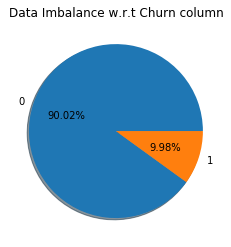

In [39]:
# Pie plot to visualize the data w.r.t Target 'Churn'
plot_pie('Churn',telecom_data,'Data Imbalance w.r.t Churn column')

Let us proceed with outlier treatment and Model Building.

#### Outlier Check and Treatments

In [40]:
# Getting a list of Numerical Columns
num_cols = telecom_data.select_dtypes(exclude='object').columns.tolist()

In [41]:
#iterating through the columns and removing outliers
telecom_data_no_out = telecom_data.copy()

# filtering the data between 0.005 and 0.98
# Trying to remove where average recharge amount is too high and very low

q_98 = telecom_data['avg_rech_amt_tot'].quantile(0.98)
q_005 = telecom_data['avg_rech_amt_tot'].quantile(0.005)
print("98th percentile of average amount of recharge in good phase : ",q_98)

# Filtering the high value customers >= q_005 and <= q_98
telecom_data_wo_outliers=telecom_data[(telecom_data['avg_rech_amt_tot'] <= q_98) & (telecom_data['avg_rech_amt_tot'] >=q_005)]
telecom_data_wo_outliers.shape

98th percentile of average amount of recharge in good phase :  4338.0


(29292, 184)

In [42]:
#Maintaining a copy of cleaned/filtered dataset
telecom_data_org = telecom_data.copy()

In [43]:
#Moving a copy of outlier treated dataset to telecom_data
telecom_data = telecom_data_wo_outliers.copy()

In [44]:
telecom_data.select_dtypes(exclude=['object']).columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'isd_ic_mou_diff', 'spl_ic_mou_diff', 'total_ic_mou_diff',
       'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff',
       'spl_og_mou_diff', 'total_og_mou_diff', 'roam_ic_mou_diff',
       'roam_og_mou_diff'],
      dtype='object', length=184)

In [45]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29292 entries, 7000842753 to 7000498689
Columns: 184 entries, arpu_6 to roam_og_mou_diff
dtypes: float64(157), int32(1), int64(26)
memory usage: 41.2 MB


### Data Visualization

#### Univariate - Continuous

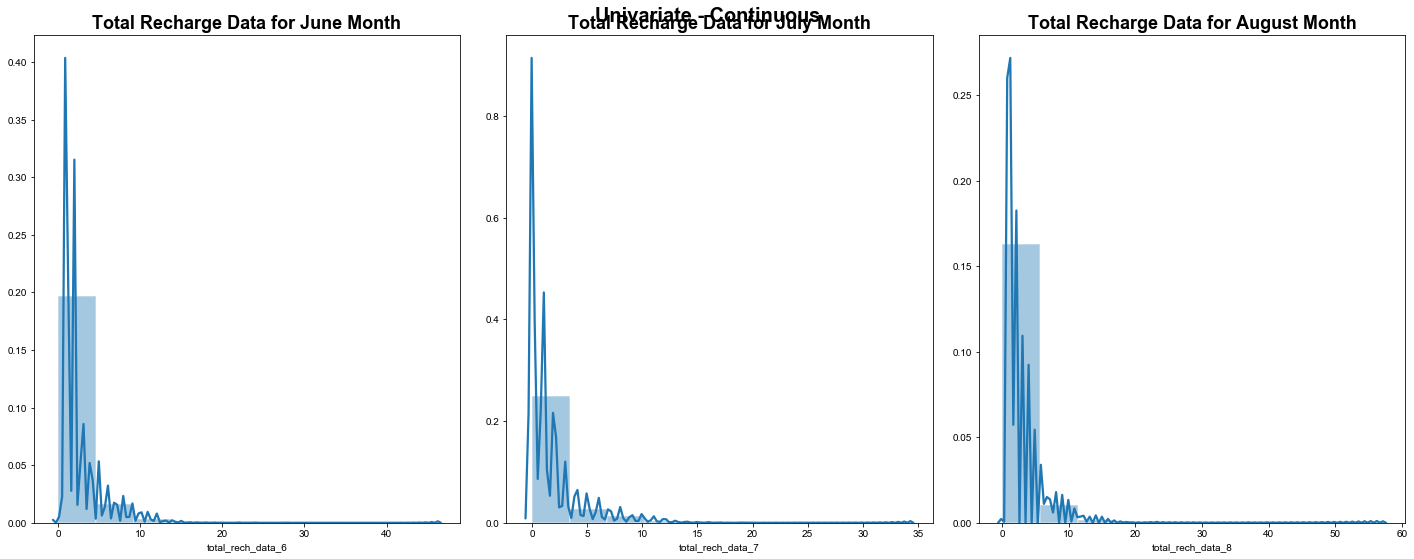

In [46]:
# Creating subplots to produce the plots simultaneously
fig,axis = plt.subplots(1,3,figsize=(20 ,8))

#Setting up the style and contexts
fig.suptitle('Univariate - Continuous',weight='bold',fontsize=20)
sns.set_style('whitegrid')
sns.set_context('talk')
sns.axes_style('dark')

#Plotting the Histograms 1 in the subplot with all the parameters required are passed
plot1=sns.distplot(telecom_data['total_rech_data_6'],kde=True,bins=10,ax=axis[0])
plot1.set_title('Total Recharge Data for June Month',weight='bold')

#Plotting the Histograms 2 in the subplot with all the parameters required are passed
plot2=sns.distplot(telecom_data['total_rech_data_7'],kde=True,bins=10,ax=axis[1])
plot2.set_title('Total Recharge Data for July Month',weight='bold')

#Plotting the Histograms 3 in the subplot with all the parameters required are passed
plot3=sns.distplot(telecom_data['total_rech_data_8'],kde=True,bins=10,ax=axis[2])
plot3.set_title('Total Recharge Data for August Month',weight='bold')

plt.tight_layout()
plt.show()

#### Inferences:
- By looking at the distribution plot for few continuous variables, we could see that all the 'Data Recharge Amount' features/variables are left skewed.

#### Bivariate
- Continuous vs Categorical

In [47]:
def boxplots(colx):
    # Creating subplots to produce the plots simultaneously
    fig,axis = plt.subplots(1,3,figsize=(20,8))
    
    #Setting up the style and contexts
    #fig.suptitle('Telecom Churn Data',weight='bold',fontsize=24)
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.axes_style('dark')
    
    #Plotting the boxplot 1 in the subplot with all the parameters required are passed
    plot1 = sns.boxplot(data=telecom_data,x='Churn',y=colx+'_6',hue='Churn', ax = axis[0],showfliers=False,palette='tab10')
    plot1.set_xlabel('Churn'.upper(),fontsize = 18)
    plot1.set_ylabel(colx+'_6'.upper(),fontsize = 20)
    
    #Plotting the boxplot 2 in the subplot with all the parameters required are passed
    plot2 = sns.boxplot(data=telecom_data,x='Churn',y=colx+'_7',hue='Churn', ax = axis[1],showfliers=False,palette='tab10')
    plot2.set_xlabel('Churn'.upper(),fontsize = 18)
    plot2.set_ylabel(colx+'_7'.upper(),fontsize = 20)
    
    #Plotting the boxplot 3 in the subplot with all the parameters required are passed
    plot3 = sns.boxplot(data=telecom_data,x='Churn',y=colx+'_8',hue='Churn', ax = axis[2],showfliers=False,palette='tab10')
    plot3.set_xlabel('Churn'.upper(),fontsize = 18)
    plot3.set_ylabel(colx+'_8'.upper(),fontsize = 20)

    plt.tight_layout()
    plt.show()

In [48]:
rech_amt_cols=['total_rech_amt','max_rech_amt']
data_rech_amt_cols=['total_rech_data','max_rech_data']
incoming_cols=['loc_ic_mou','std_ic_mou','isd_ic_mou','spl_ic_mou','total_ic_mou']
outgoing_cols=['loc_og_mou','std_og_mou','isd_og_mou','spl_og_mou','total_og_mou']
roaming_cols=['roam_ic_mou','roam_og_mou']

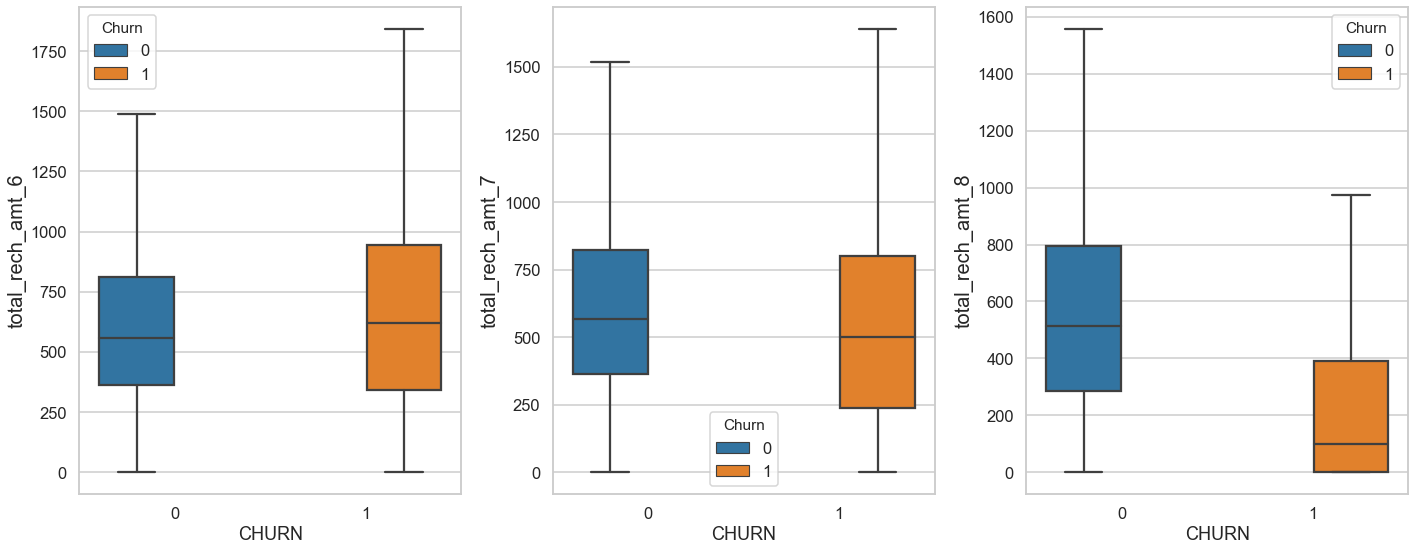

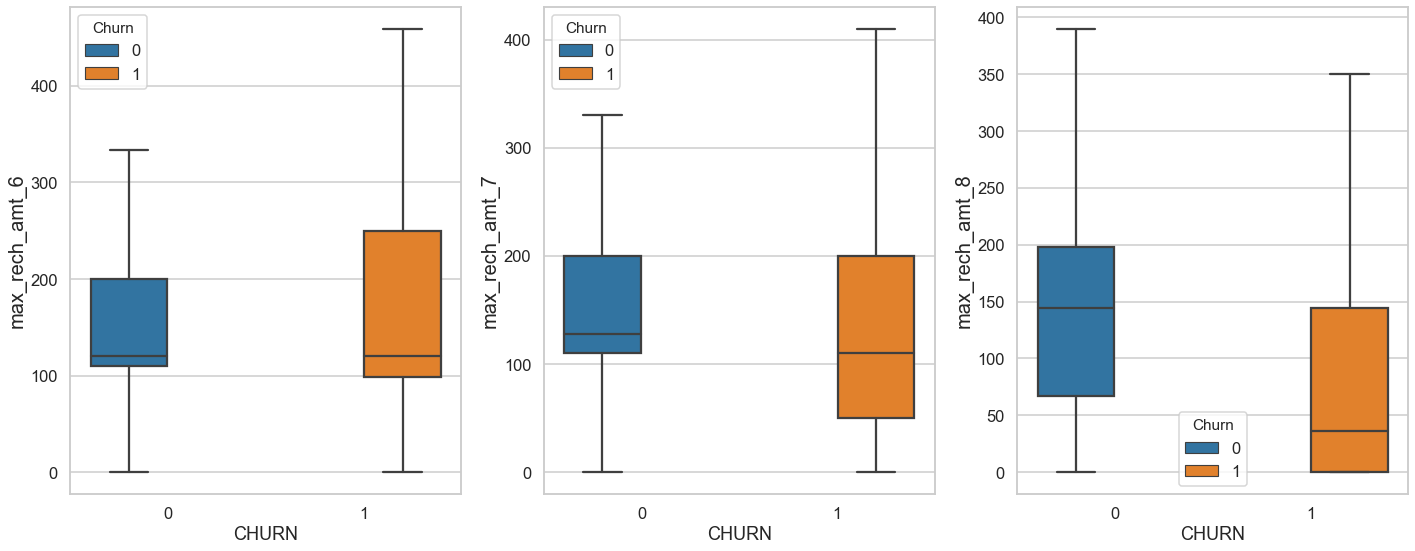

In [49]:
#Visualization for Recharge amount features
for col in rech_amt_cols:
    boxplots(col)

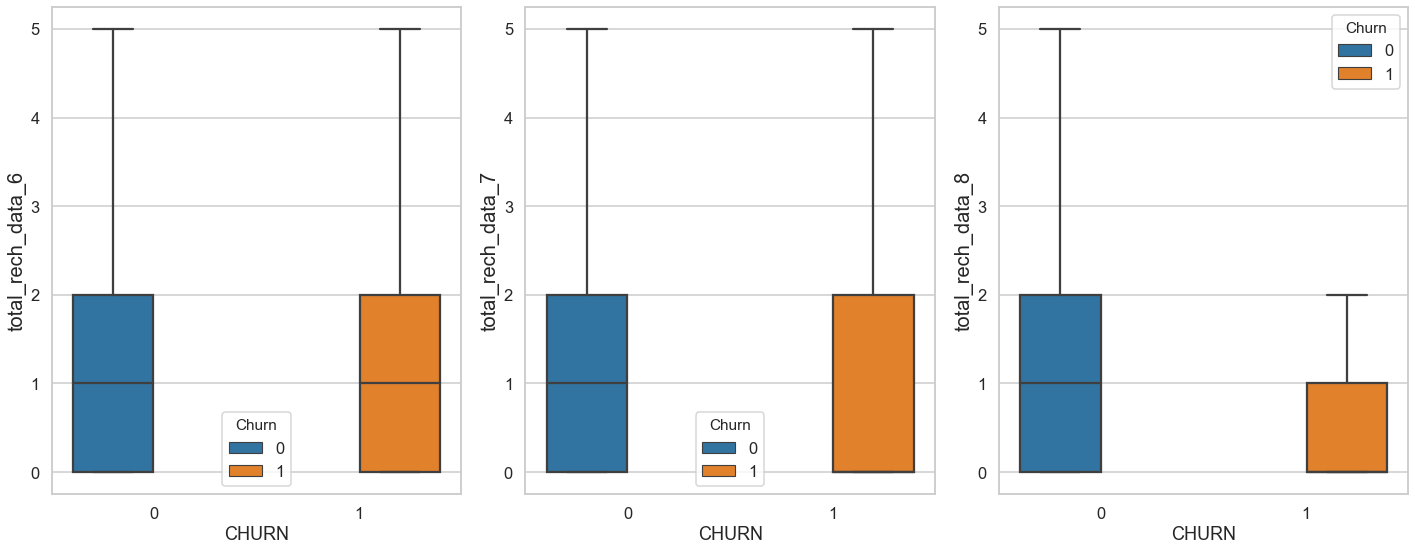

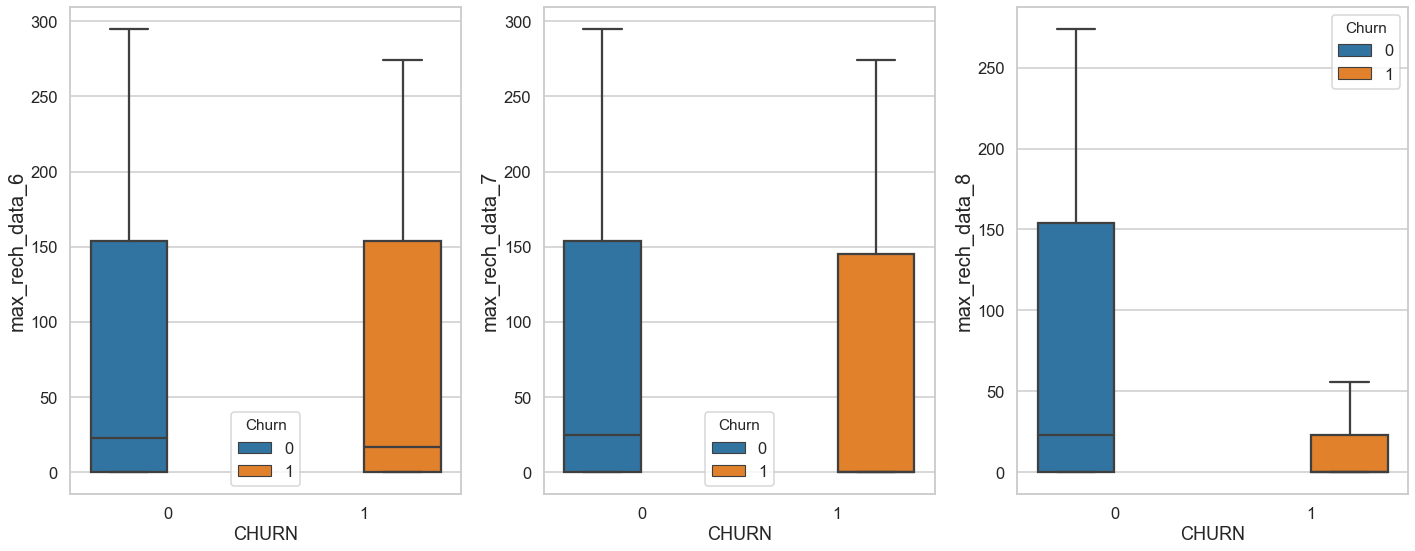

In [50]:
#Visualization for Data Recharge amount features
for col in data_rech_amt_cols:
    boxplots(col)

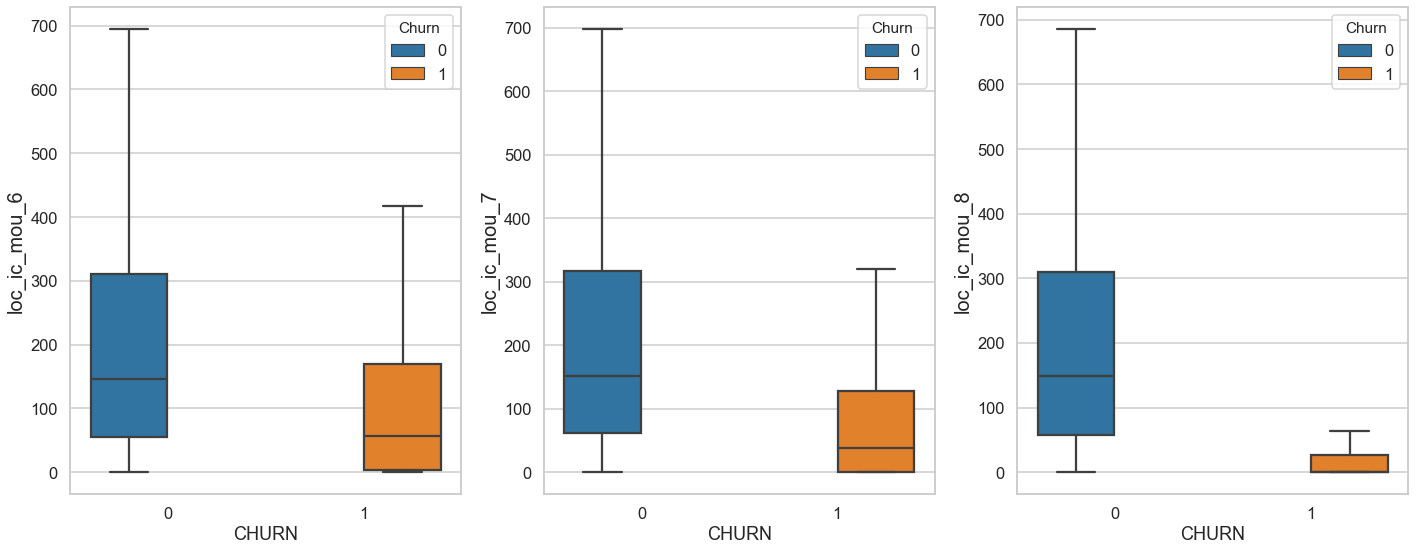

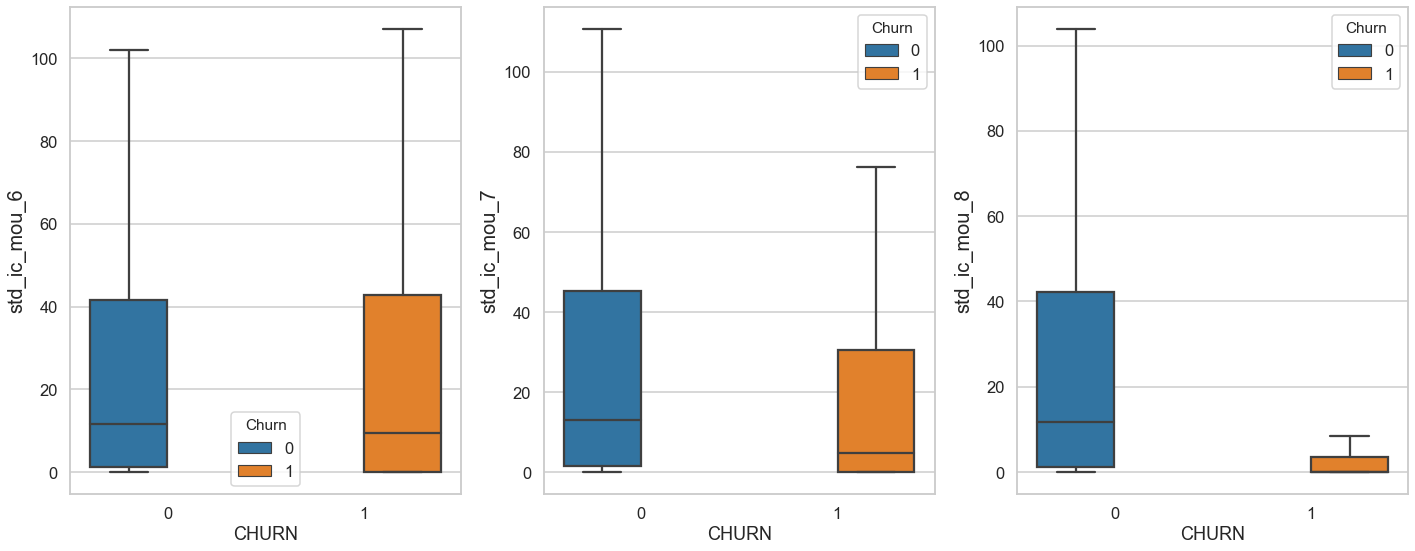

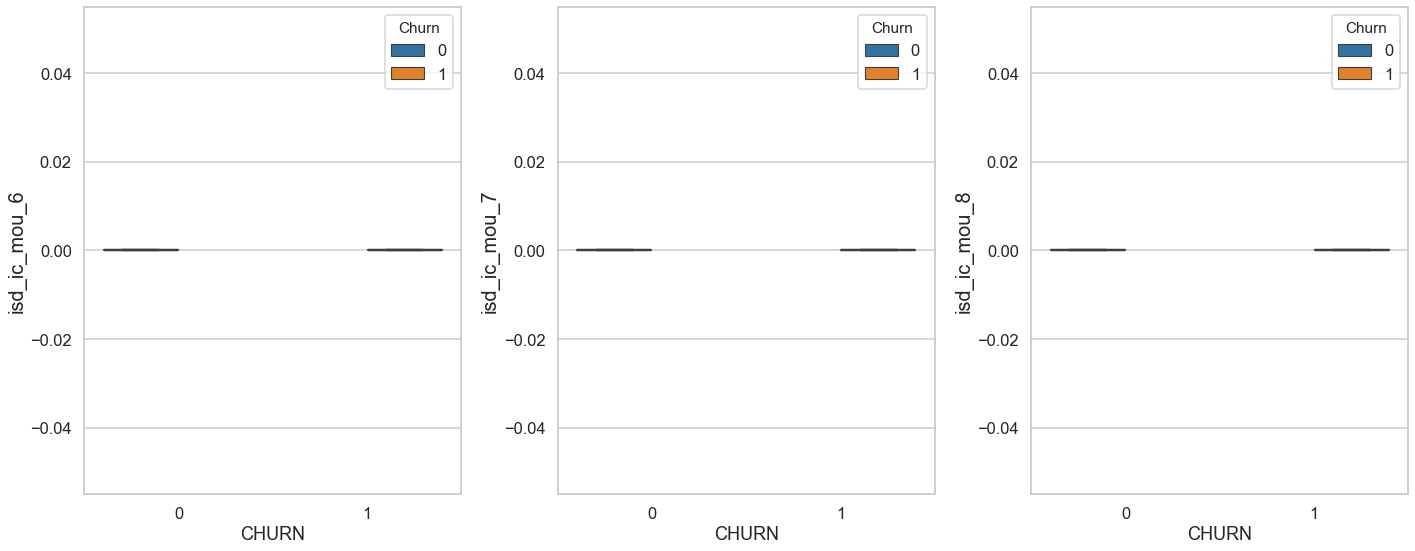

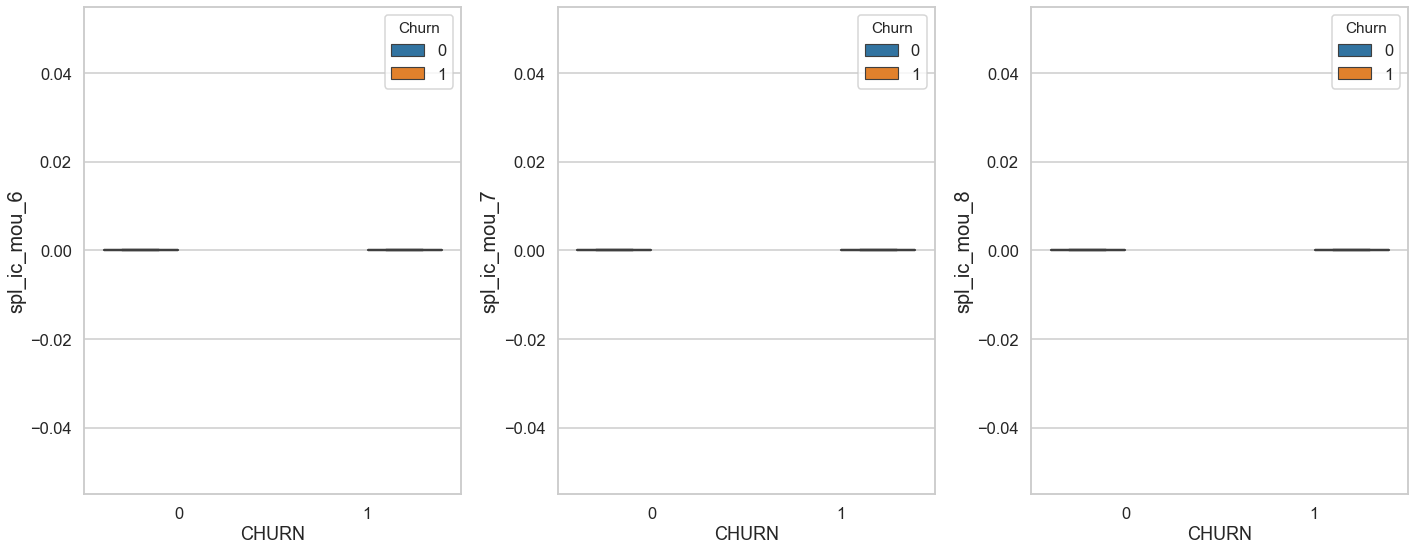

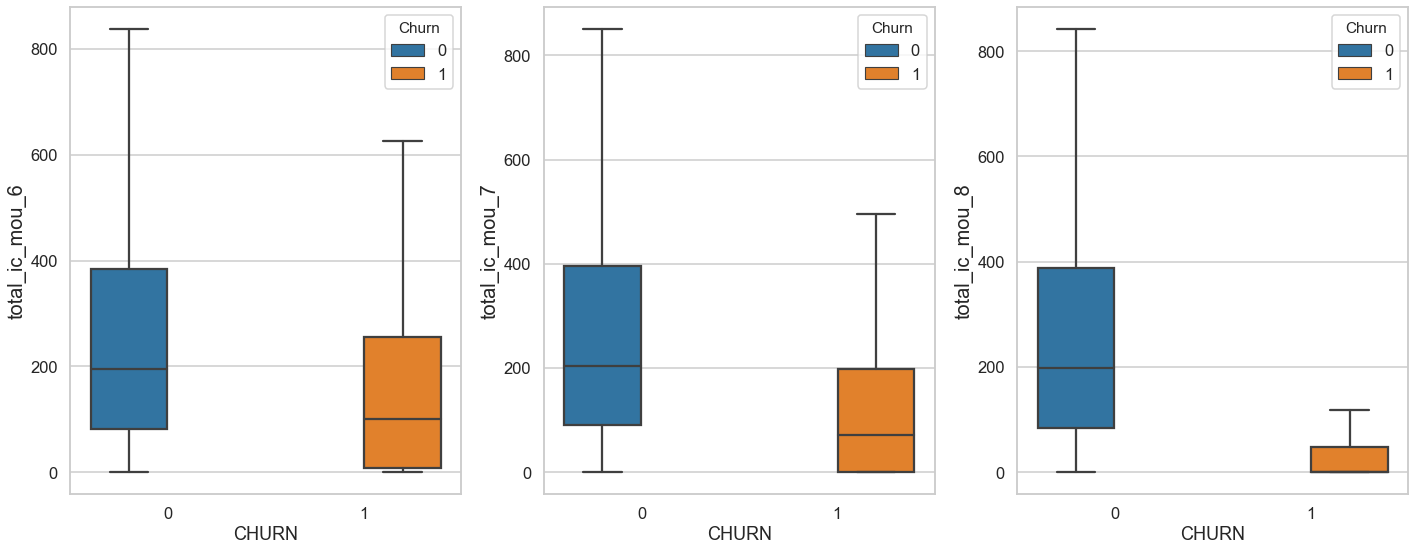

In [51]:
#Visualization for Incoming Calls features
for col in incoming_cols:
    boxplots(col)

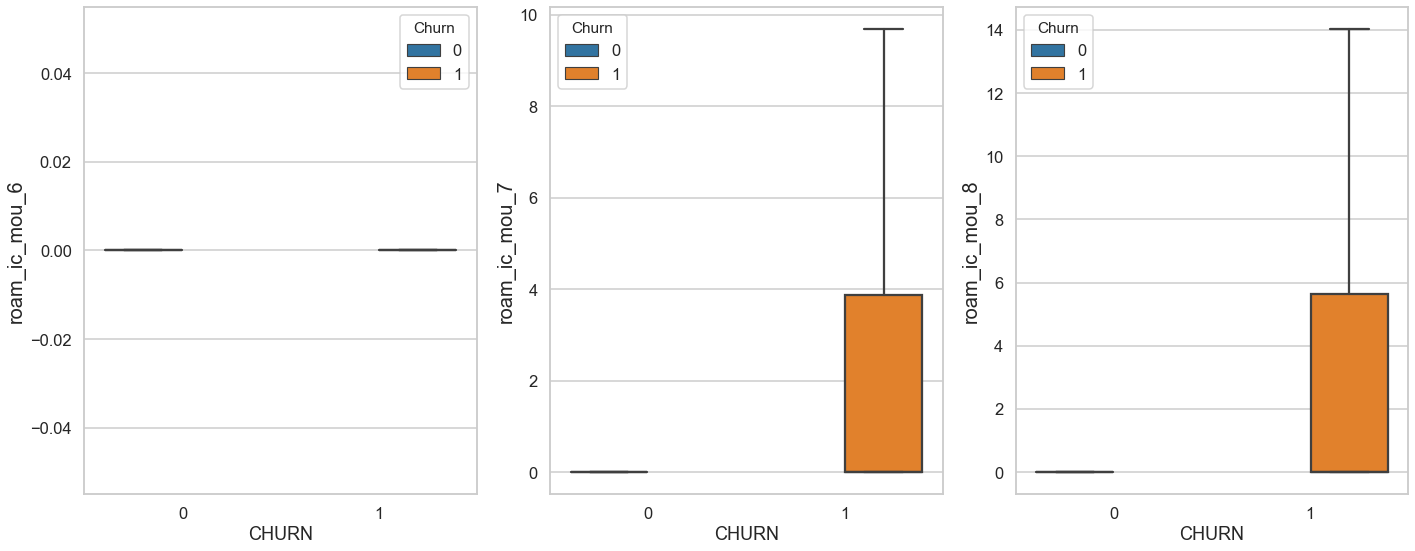

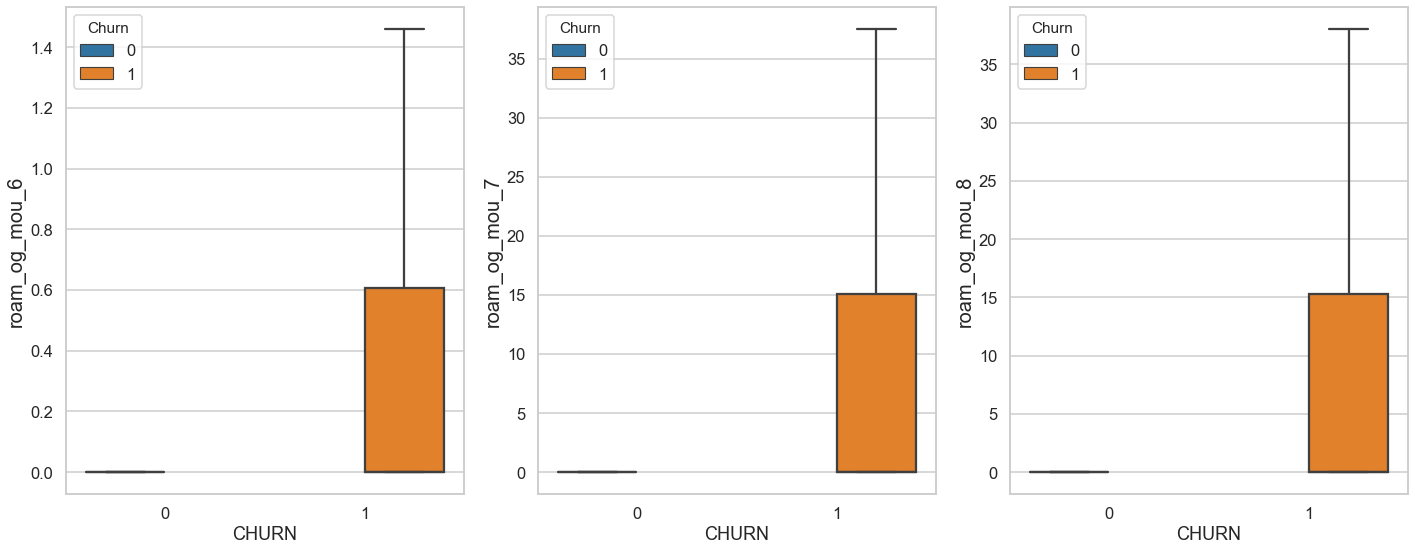

In [52]:
#Visualization for Roaming Calls features
for col in roaming_cols:
    boxplots(col)

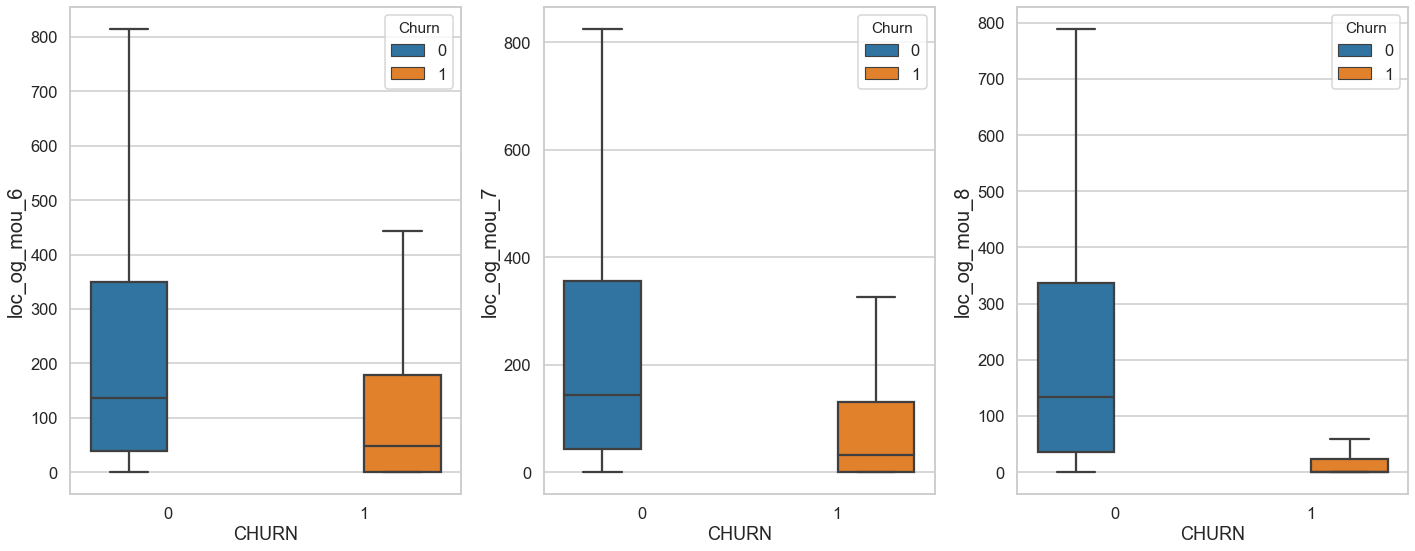

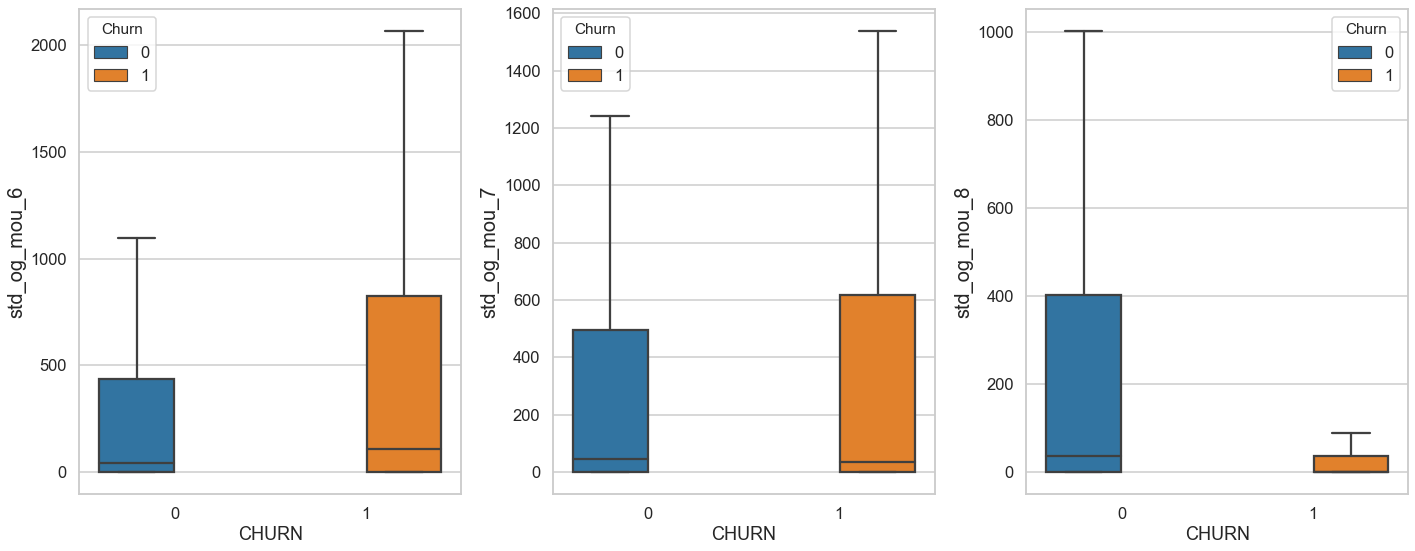

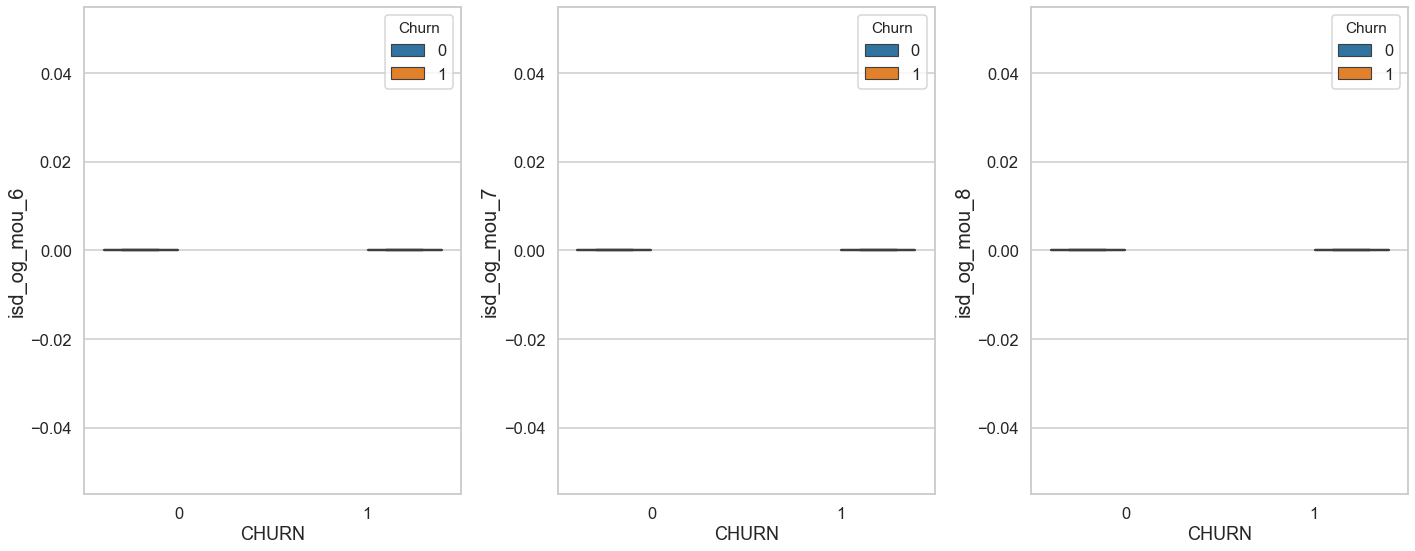

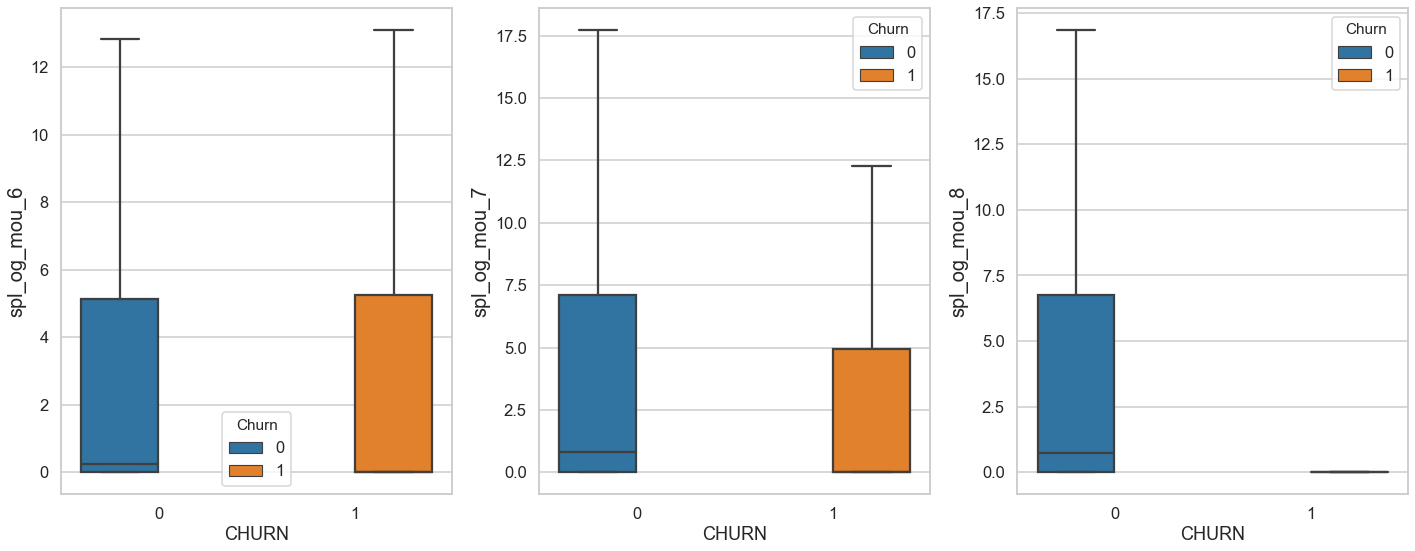

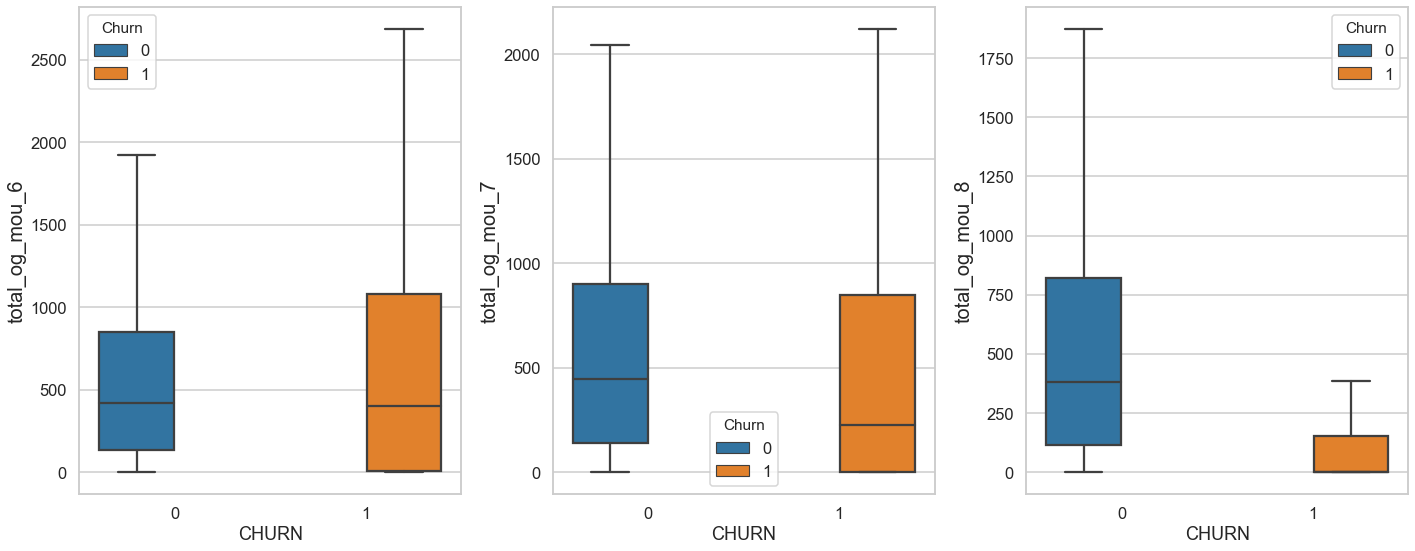

In [53]:
#Visualization for Outgoing Calls features
for col in outgoing_cols:
    boxplots(col)

### Inferences for Visualization

We have plotted for different features for 'Good' phase (June and July months) and 'Action' (August month) phase. Below are the insights for different features:

<b><i> - Insights for Recharge amount features:</i></b>

   1. Total Recharge Amount and Max Recharge Amount is higher for Churned users during the 'Good' phase. However, there is a   big drop in the Total recharge amount and Max Recharge Amount for Churned users during the 'Action' phase.

<b><i> - Insights for Data Recharge amount features: </i></b>
   1. Total Recharge Data is normal for Churned users during the 'Good' phase and it is similar to non-Churned users. However,  there is a drop in the Total Recharge Data for Churned users during the 'Action' phase.
   2. Max Recharge Data is slightly lesser for Churned users during the 'Good' phase when compared to Non-Churned Users. However, there is a big drop in the Max Recharge Data for Churned users during the 'Action' phase.

<b><i>- Insights for Incoming Calls features:</i></b>
1. For Churned users,Local and Total Incoming Calls is gradually reducing starting from June, July months and the calls are lowest during the Action phase. For Non-Churned Users, the Local and Total Incoming Calls are almost similiar in both Good and Action Phases.<br>
2. For Churned users: STD Incoming Calls is higher during the June month and lesser calls during July month. In Action Phase the STD Incoming Calls are lowest.<br> For Non-Churned Users, STD Incoming Calls are almost similiar in both Good and Action Phase.<br>
4. There is no usage for ISD and Special Calls for both phases.

<b><i>- Insights for Outgoing Calls features:</i></b>
1. For Churned users,Local, Special and Total Outgoing Calls is gradually reducing starting from June, July months and the calls are lowest during the Action phase. For Non-Churned Users, the Local and Total Incoming Calls are almost similiar in both Good and Action Phase <br>
2. For Churned users: STD and Total Outgoing Calls are higher during Good phase and similar values in both June and July month. Close to 2000 minutes STD calls and 2500 minutes Special Calls are made during Good phase and in  the  next month/Action Phase the STD and Total Outgoing Calls are lowest (close to 100 for STD and 400 for Total). This explains that the customer making less STD calls during Action phase and it could be due to high tariff/charges or customer would have started to compare the competitor recharge packs and planned to reduce the usage. After very low reduction the next step could be switch to competitor.<br> For Non-Churned Users, STD Outgoing Calls are gradually increasing starting from June & July in both Good and there is higher number of calls in Action Phase. <br>
3. There is no usage for ISD Outgoing for both phases.

<b><i>- Insights for Roaming Calls features:</i></b>
  1. For Churned Users, No Roaming Incoming Calls made in June month. However there are high number of Roaming Incoming Calls in July and August Month. For Non-Churned Users, there are no Roaming Incoming Calls in both phases.
  2. For Churned Users, there is high number of Roaming Outgoing Calls and similar usage in both Good and Action Phases. For Non-Churned Users, there are no Roaming Outgoing Calls in both phases.

#### Bivariate
- Continuous vs Continuous

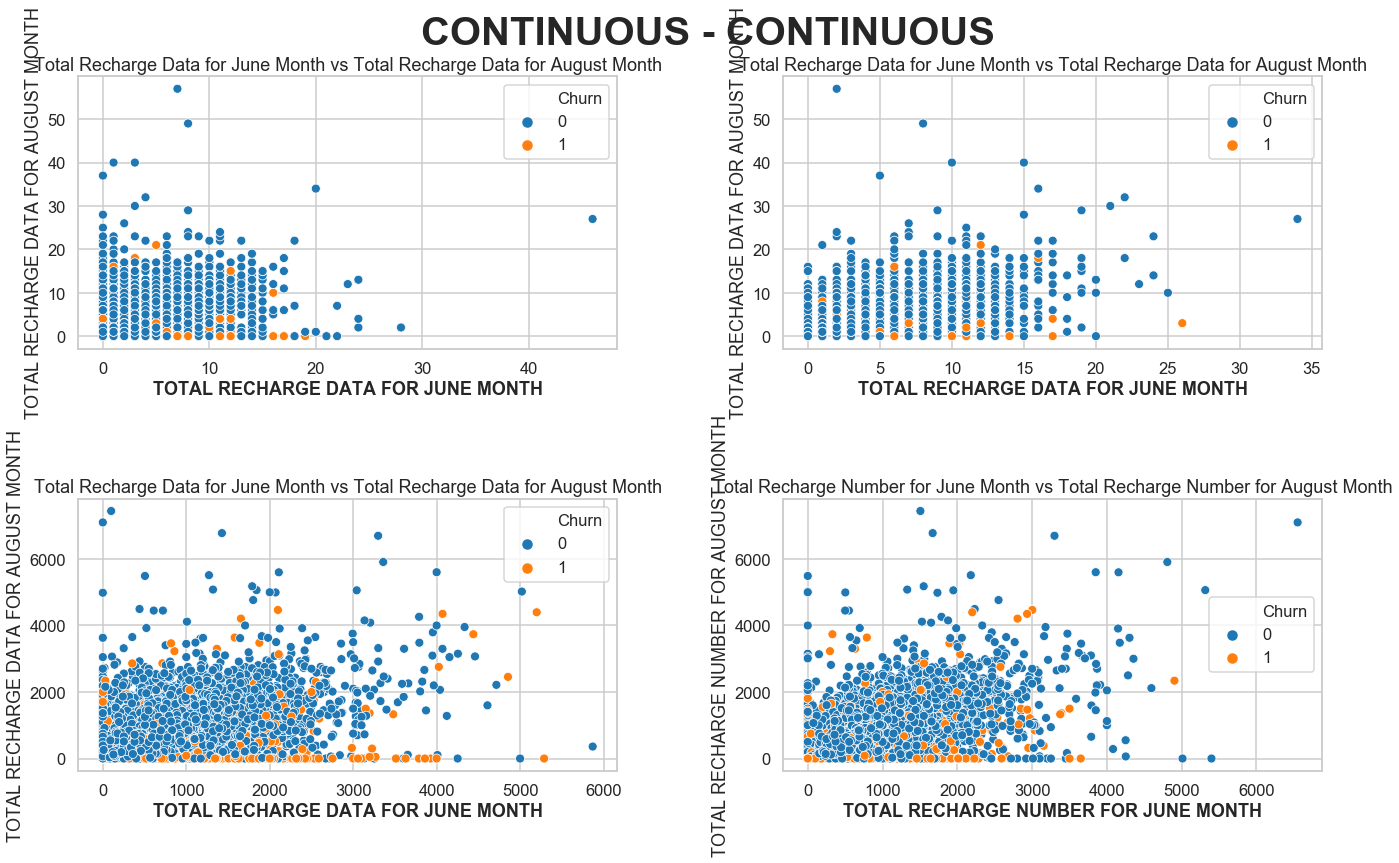

In [54]:
# Creating subplots to produce the plots simultaneously
fig,axis = plt.subplots(2,2,figsize=(20 ,12))

#Setting up the style and contexts
fig.suptitle('Continuous - Continuous'.upper(),weight='bold',fontsize=40)
sns.set_style('whitegrid')
sns.set_context('talk')
sns.axes_style('dark')

# Plotting subplot 1 with necessary parameters
plt.subplot(2,2,1)
sns.scatterplot(data =telecom_data, x='total_rech_data_6',y='total_rech_data_8', hue ='Churn')
plt.title('Total Recharge Data for June Month vs Total Recharge Data for August Month')
plt.xlabel("Total Recharge Data for June Month".upper(),weight="bold")
plt.ylabel("Total Recharge Data for August Month".upper())

# Plotting subplot 2 with necessary parameters
plt.subplot(2,2,2)
sns.scatterplot(data =telecom_data, x='total_rech_data_7',y='total_rech_data_8', hue ='Churn')
plt.title('Total Recharge Data for June Month vs Total Recharge Data for August Month')
plt.xlabel("Total Recharge Data for June Month".upper(),weight="bold")
plt.ylabel("Total Recharge Data for August Month".upper())

# Plotting subplot 3 with necessary parameters
plt.subplot(2,2,3)
sns.scatterplot(data =telecom_data, x='total_rech_amt_6',y='total_rech_amt_8', hue ='Churn')
plt.title('Total Recharge Data for June Month vs Total Recharge Data for August Month')
plt.xlabel("Total Recharge Data for June Month".upper(),weight="bold")
plt.ylabel("Total Recharge Data for August Month".upper())

# Plotting subplot 4 with necessary parameters
plt.subplot(2,2,4)
sns.scatterplot(data =telecom_data, x='total_rech_amt_7',y='total_rech_amt_8', hue ='Churn')
plt.title('Total Recharge Number for June Month vs Total Recharge Number for August Month')
plt.xlabel("Total Recharge Number for June Month".upper(),weight="bold")
plt.ylabel("Total Recharge Number for August Month".upper())

plt.tight_layout()
plt.show()

#### Continuous Variables - Visualization
- Correlation Matrix and Heatmap

In [55]:
# Getting a list of Numerical Columns
num_cols = telecom_data.select_dtypes(exclude='object').columns.tolist()

In [56]:
# Showing the best correlations
telecom_data_corr   = telecom_data.corr()
corr_telecom        = telecom_data_corr.where(np.triu(np.ones(telecom_data_corr.shape),k=1).astype(bool))
corr_telecom        = corr_telecom.unstack().reset_index().dropna(subset=[0])
corr_telecom.columns= ['Column Variable 1','Column Variable 2','Correlation Value']
corr_telecom['Correlation Absolute'] = abs(corr_telecom['Correlation Value'])
corr_telecom.sort_values(by='Correlation Absolute',ascending=False,inplace=True)
corr_telecom.iloc[0:15,:]

,Column Variable 1,Column Variable 2,Correlation Value,Correlation Absolute
30339,avg_rech_amt_tot,total_rech_amt_all_good,1.000000,1.000000
25318,sachet_2g_8,count_rech_2g_8,0.984634,0.984634
25133,sachet_2g_7,count_rech_2g_7,0.982694,0.982694
24948,sachet_2g_6,count_rech_2g_6,0.981140,0.981140
20159,count_rech_2g_7,total_rech_data_7,0.936398,0.936398
17482,total_rech_amt_8,arpu_8,0.935032,0.935032
19974,count_rech_2g_6,total_rech_data_6,0.930815,0.930815
25127,sachet_2g_7,total_rech_data_7,0.927001,0.927001
20344,count_rech_2g_8,total_rech_data_8,0.921700,0.921700
24942,sachet_2g_6,total_rech_data_6,0.920180,0.920180


### Train-Test Split

In [57]:
#random_state is the seed used by the random number generator, it can be any integer.
y=telecom_data['Churn']
X=telecom_data.drop('Churn',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 ,test_size = 0.25, random_state=random_state)

### Feature Scaling

In [58]:
#Initializing MinMaxScalar

mms = MinMaxScaler()

#Including the Numerical variables for scaling
cols_to_scale = X.select_dtypes(include=['int32','int64','float64']).columns

In [59]:
#scaling the Training dataset
X_train[cols_to_scale] = mms.fit_transform(X_train[cols_to_scale])

#scaling the Test dataset
X_test[cols_to_scale] = mms.transform(X_test[cols_to_scale])

### PCA

In [60]:
#initializing  PCA
#pca = PCA(svd_solver='auto', random_state=random_state)
pca = PCA(random_state=random_state)

In [61]:
# fitting 
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

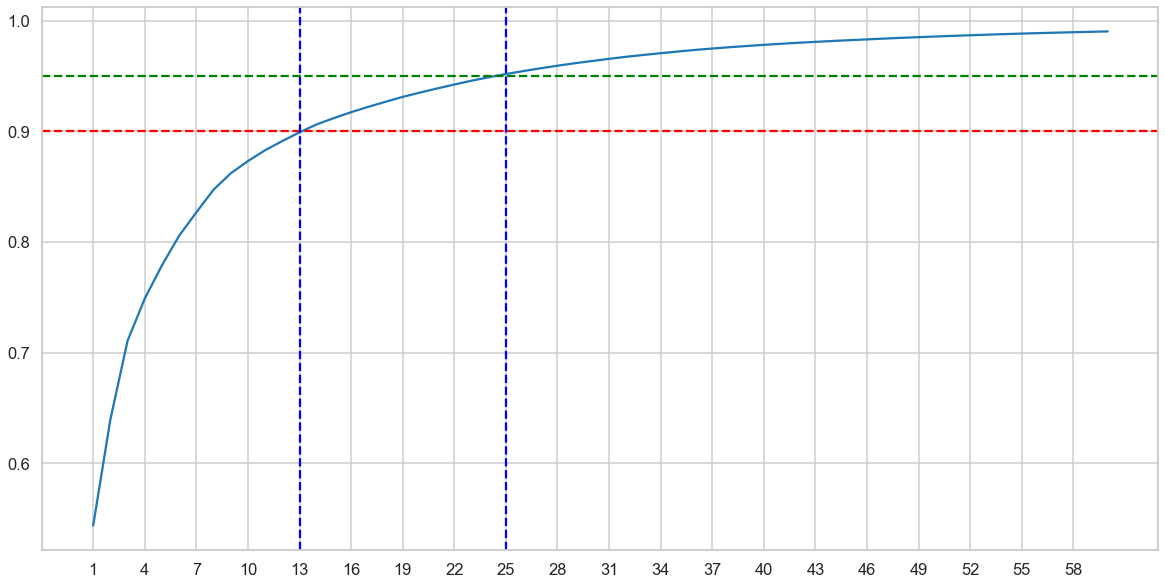

In [62]:
# Visualzing the PCA for optimum no of PCs
fig = plt.figure(figsize=(20, 10)) 
x = range(1,X_train.shape[1]+1)
plt.xticks(np.arange(min(x), 61, 3.0))
sns.lineplot(y=np.cumsum(pca.explained_variance_ratio_[:60]),x = range(1,61))
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=13, color='b', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.axvline(x=25, color='b', linestyle='--')

From the above plot, we could see that
- 13 principal components explains 90% of variance
- 25 principal components explains 95% of variance

In [63]:
# we choose 13 principal components as it explains 90% of variance 

pca_new= PCA(n_components=13, random_state=random_state)
pca_train= pca_new.fit_transform(X_train)
pca_train.shape

(21969, 13)

In [64]:
pca_columns=[]
for i in range(1,14):
    i=str(i)
    value='PCA'+i
    pca_columns.append(value)
df_train = pd.DataFrame(pca_train, columns=pca_columns,index=X_train.index)
df_train.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
mobile_number,,,,,,,,,,,,,
7002101499,0.347625,0.004752,1.224389,-0.132560,-0.116430,0.059508,-0.033457,-0.124073,-0.094590,0.112310,-0.094648,-0.197151,0.242676
7001605830,0.286363,0.893536,-0.533356,-0.097523,-0.109837,-0.276061,0.311416,0.065743,-0.153650,-0.353387,-0.018238,0.297261,-0.032095
7001062051,-0.475725,1.132628,0.575184,-0.205212,0.649366,0.678863,-0.232505,0.427771,-0.400673,0.130607,0.038229,0.000284,-0.047597
7001238664,1.188096,0.091376,0.030666,-0.323098,0.821094,1.123438,-0.033979,0.741695,-0.417786,0.012167,0.024886,0.390345,0.397361
7000990776,-1.305147,-0.037999,0.014725,-0.041379,-0.293017,0.118201,-0.152977,-0.085441,-0.026833,0.149628,0.045749,0.043480,0.030213


In [65]:
#Applying selected components to the test data - 13 components
pca_test = pca_new.transform(X_test)
pca_test.shape

(7323, 13)

In [66]:
df_test = pd.DataFrame(pca_test, columns=pca_columns,index=X_test.index)
df_test.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
mobile_number,,,,,,,,,,,,,
7001007714,0.356147,0.977178,-0.547192,-0.227757,0.177991,-0.210838,0.042957,-0.127364,0.063688,0.051386,0.013239,0.074677,-0.067333
7002093197,1.318139,0.068367,0.086034,0.638541,0.099442,0.325619,0.055851,-0.077126,0.473956,-0.045030,-0.048422,-0.137842,-0.113517
7000360781,-1.327280,-0.036422,0.002742,0.113046,0.138626,-0.074573,0.214943,-0.061417,-0.015027,-0.107856,-0.021005,0.065312,0.016174
7002016287,0.332776,-0.046391,1.231918,-0.050371,-0.215956,0.215152,-0.043033,-0.040037,0.116515,-0.119101,0.007864,0.080482,-0.096012
7001824343,1.164097,0.101803,0.037665,-0.229729,0.749047,0.699812,-0.146835,0.499392,-0.424185,0.019971,0.072654,0.035022,-0.180736


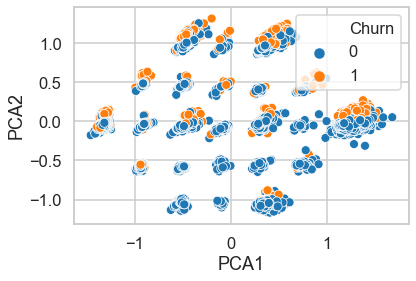

In [67]:
df = df_train.copy()
df = df.merge(y_train,left_index=True,right_index=True,how="left")
sns.scatterplot(x="PCA1", y="PCA2",hue='Churn', data=df)

#### Model Selection

In [68]:
# Parameters for Random Forest
params_rf = {'criterion':['gini','entropy'],
          'n_estimators':[100,200,500,1000],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[random_state],
          }

#Parameters for Logistic Regression
param_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

#Model Evaluation Metrics
scores = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [69]:
#Different Models to be build and results to be compared
models_to_compare = {'Logistic': LogisticRegression(class_weight='balanced'),
                     'DecisionTree':DecisionTreeClassifier(class_weight='balanced'),
                     'RandomForest':RandomForestClassifier(class_weight='balanced'),
                     'Gaussian NB':GaussianNB()}

In [70]:
# this function will do gridsearchcv in and print the better hyper parameters
def param_tune(model_name,model,param,df_x,df_y,n_j=-1):
    # GridSearch for identifying best parameters
    model1 = GridSearchCV(model, param_grid=param, n_jobs=n_j)
    model1.fit(df_x,df_y)
    
    # Best Hyper parameters
    print("Best Hyper Parameters for:",model_name,'\n',model1.best_params_)

In [71]:
# This function helps us with comparison of models.
# Also it plots the mean of scoring in a box plot
def model_compare(models,df_x,df_y,scoring = 'accuracy'):
    
    model_res = []
    modnames = []
    
    print('Model ',scoring,'Comparison\n')
    # looping each model form the dictionary and performing cross validation
    for modname, model in models.items():
        kfold = KFold(n_splits=10, random_state=random_state)
        crossv = cross_val_score(model, df_x, df_y, cv=kfold, scoring=scoring)
        print(modname,': Mean-', round(crossv.mean(),2),' STD-' , round(crossv.std(),4))
        model_res.append(crossv)
        modnames.append(modname)
     
    model_res = pd.DataFrame(model_res,index = modnames )
    
    # boxplot for Model scoring visulization
    fig,ax = plt.subplots()
    fig.canvas.draw()
    plt.boxplot(model_res)
    plt.title('Model Comparison Plot- ' + scoring)
    #plt.xticks(rotation='vertical' )
    ax.set_xticklabels(modnames)
    plt.show()

Model  accuracy Comparison

Logistic : Mean- 0.79  STD- 0.0092
DecisionTree : Mean- 0.88  STD- 0.0053
RandomForest : Mean- 0.93  STD- 0.0051
Gaussian NB : Mean- 0.9  STD- 0.007


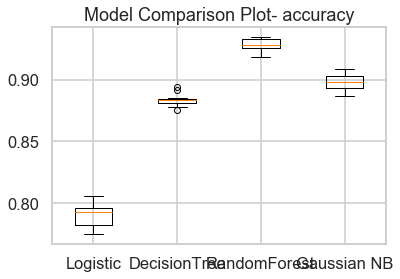

In [72]:
# Comparing the models using the PCA dataset for better accuracy
model_compare(models_to_compare,df_train,y_train)

#### Inferences for Model Comparison
1. Based on the above scores, accuracy of Decision Tree and Random Forest average scores and their corresponding STD scores also good.
2. Let us try modeling various Algorithms after hyper value tuning and compare/evaluate their performances.
3. concern about the churn and so we are looking for better recall(sensitivity)
4. Let us try with various models and tune the same for better recall 

In [73]:
# calculates and prints confusion matrix
def conf_matrix(y_pr,y_c):
   
    print('Confusion Matrix:\n')
    conf_arr = confusion_matrix(y_c, y_pr)
    TP = conf_arr[1,1] # True positive 
    TN = conf_arr[0,0] # True negatives
    FP = conf_arr[0,1] # False positives
    FN = conf_arr[1,0] # False negatives
    
    print('True Positives:',TP)
    print('True Negatives:',TN)
    print('False Positives:',FP)
    print('False Negatives:',FN)
    return (TP,TN,FP,FN)

In [74]:
#Model summary
# this function creates ROC curve,calculates cutoffs and plot the accuracy, sensitivity and specificity plot
def Model_summary(df_y,df_y_test,alg='logit'):
          
    # list of probabilities for cutoff calculation
    numbers = [float(x)/10 for x in range(10)] + [float(x)/100 for x in range(40,50,2)] 
    numbers = sorted(numbers)
        
    #confusion matrix    
    TP,TN,FP,FN = conf_matrix(df_y['Churn'],df_y['Pred'])
        
    #ROC curve
    fp, tp, thresholds =roc_curve(df_y['Churn'], df_y['pred_prob'], drop_intermediate = False )
    roc_auc = auc(fp, tp)
    
    # precision vs recall
    p, r, thresholds =precision_recall_curve(df_y['Churn'], df_y['pred_prob'])
    
    #Classification Report
    print("Classification Report",'\n',classification_report(df_y['Churn'], df_y['Pred'])) 
    print("Area under the ROC curve : ",round(roc_auc*100,2),'%')
    
    plt.plot( fp, tp, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.2])
    plt.ylim([0.0, 1.2])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
    # Optimal Cut-off - calculating for various prob.  
    for i in numbers:
        df_y[i]= df_y['pred_prob'].map(lambda x: 1 if x > i else 0)
    
    cutoff_df = pd.DataFrame( columns = ['prob','sensitivity','specificity','accuracy','Precision','FPR','NPV','PPV','recall'])
    
    for prob in numbers:
        
        conf_metrix = confusion_matrix(df_y['Churn'], df_y[prob])
        TP = conf_metrix[1,1] # True positives 
        TN = conf_metrix[0,0] # True negatives
        FP = conf_metrix[0,1] # False positives
        FN = conf_metrix[1,0] # False negatives
        
        tot=TP + TN + FP + FN
        sensitivity = TP/float(TP+FN)
        specificity = TN/float(TN+FP)
        accuracy = (TP+TN)/float(tot)
        Precision = TP/float(TP+FP)
        #false postive rate
        FPR = FP/float(TN+FP)
        NPV = TN/float(TN+ FN)
        PPV = TP/float(TP+FP)
        recall= sensitivity.copy()
        cutoff_df.loc[prob] =[ prob,sensitivity,specificity,accuracy,Precision,FPR,NPV,PPV,recall]
    print(cutoff_df)
    
    # plotting the values for visualizing optmimal cutoff
    cutoff_df.plot.line(x='prob', y=['recall','accuracy','Precision'])
    #cutoff_df.plot.line(x='prob', y=['sensitivity','specificity','accuracy','FPR','NPV','PPV'])
    plt.show()
    #Classification Report test
    print("Classification Report test",'\n',classification_report(df_y_test['Churn'], df_y_test['Pred']))

In [75]:
# This function helps in tuning the hyper parameters

def tune_model(alg,param,score,xtrain,ytrain,x,y,name):
    # finding the better parameter for recall as we are conserned about better true positives - identifying churn customers
    model_alg = GridSearchCV(alg, param_grid=param, n_jobs=-1, scoring=score)
    model_alg.fit(xtrain,ytrain)
    
    # Best Hyper parameters
    print('Best Hyper Parameters for ',name,':\n',model_alg.best_params_)
    Churn = pd.Series(y_train.values)
    y_pred = pd.Series(model_alg.predict(xtrain))
    y_pred_prob = pd.Series(model_alg.predict_proba(xtrain)[:,1])

    # summary of the model
    y_pred_vs_churn = pd.DataFrame({'Churn':Churn, 'pred_prob':y_pred_prob,'Pred':y_pred})
    
    Churn_test = pd.Series(y.values)
    y_pred_test = pd.Series(model_alg.predict(x))
    y_pred_prob_test = pd.Series(model_alg.predict_proba(x)[:,1])

    # summary of the model
    y_pred_vs_churn_test = pd.DataFrame({'Churn':Churn_test, 'pred_prob':y_pred_prob_test,'Pred':y_pred_test})
    Model_summary(y_pred_vs_churn,y_pred_vs_churn_test)

    return y_pred_vs_churn

#### Logistic Regression

Best Hyper Parameters for  Logistic Regression :
 {'C': 5, 'class_weight': 'balanced', 'random_state': 42}
Confusion Matrix:

True Positives: 1607
True Negatives: 15792
False Positives: 602
False Negatives: 3968
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.80      0.87     19760
           1       0.29      0.73      0.41      2209

    accuracy                           0.79     21969
   macro avg       0.63      0.76      0.64     21969
weighted avg       0.90      0.79      0.83     21969

Area under the ROC curve :  84.95 %


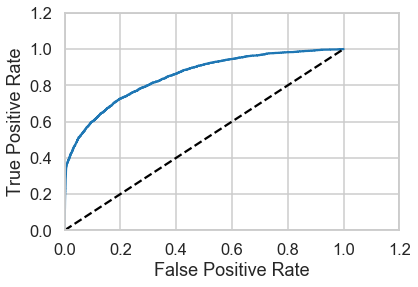

      prob  sensitivity  specificity  accuracy  Precision       FPR       NPV  \
0.00  0.00     1.000000     0.000000  0.100551   0.100551  1.000000       NaN   
0.10  0.10     0.992304     0.106174  0.195275   0.110406  0.893826  0.991962   
0.20  0.20     0.966048     0.308249  0.374391   0.135038  0.691751  0.987837   
0.30  0.30     0.899049     0.536235  0.572716   0.178117  0.463765  0.979388   
0.40  0.40     0.807605     0.692206  0.703810   0.226799  0.307794  0.969865   
0.42  0.42     0.790403     0.715486  0.723019   0.236971  0.284514  0.968290   
0.44  0.44     0.775011     0.737146  0.740953   0.247900  0.262854  0.967005   
0.46  0.46     0.758714     0.758401  0.758432   0.259845  0.241599  0.965655   
0.48  0.48     0.741059     0.777783  0.774091   0.271566  0.222217  0.964118   
0.50  0.50     0.727478     0.799190  0.791980   0.288251  0.200810  0.963279   
0.60  0.60     0.600724     0.900759  0.870590   0.403589  0.099241  0.952786   
0.70  0.70     0.428701     

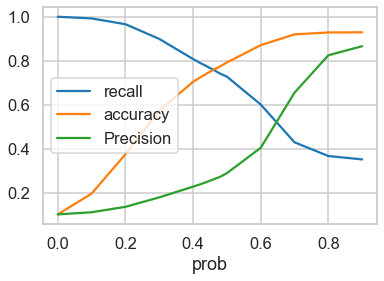

Classification Report test 
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      6614
           1       0.27      0.71      0.39       709

    accuracy                           0.79      7323
   macro avg       0.62      0.75      0.63      7323
weighted avg       0.90      0.79      0.83      7323



In [76]:
#hyper parameter values for Logistic regression
# Data is imbalanced to handle that we are instructing algorithm using the "class_weight:balanced"
param_lr = {'C': [ 0.1, 1,5,10,20],
           'class_weight':['balanced'],
           'random_state':[random_state]}

#initializing Logistic regression
logit  = LogisticRegression()
opt = tune_model(logit,param_lr,'recall',df_train,y_train,df_test,y_test,'Logistic Regression')

#### Decision Tree

Best Hyper Parameters for  Decision Tree :
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Confusion Matrix:

True Positives: 1672
True Negatives: 15919
False Positives: 537
False Negatives: 3841
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     19760
           1       0.30      0.76      0.43      2209

    accuracy                           0.80     21969
   macro avg       0.64      0.78      0.66     21969
weighted avg       0.90      0.80      0.83     21969

Area under the ROC curve :  86.05 %


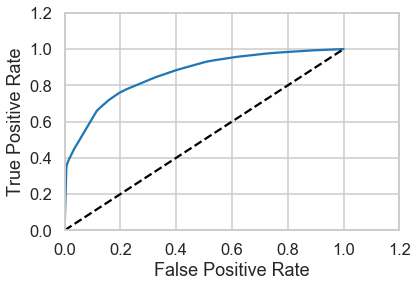

      prob  sensitivity  specificity  accuracy  Precision       FPR       NPV  \
0.00  0.00     1.000000     0.001721  0.102098   0.100707  0.998279  1.000000   
0.10  0.10     0.981440     0.228087  0.303837   0.124448  0.771913  0.990985   
0.20  0.20     0.937076     0.468826  0.515909   0.164730  0.531174  0.985217   
0.30  0.30     0.928022     0.497925  0.541172   0.171247  0.502075  0.984097   
0.40  0.40     0.776369     0.781174  0.780691   0.283987  0.218826  0.968989   
0.42  0.42     0.776369     0.781174  0.780691   0.283987  0.218826  0.968989   
0.44  0.44     0.776369     0.781174  0.780691   0.283987  0.218826  0.968989   
0.46  0.46     0.756904     0.805617  0.800719   0.303283  0.194383  0.967368   
0.48  0.48     0.756904     0.805617  0.800719   0.303283  0.194383  0.967368   
0.50  0.50     0.756904     0.805617  0.800719   0.303283  0.194383  0.967368   
0.60  0.60     0.659122     0.884615  0.861942   0.389722  0.115385  0.958701   
0.70  0.70     0.659122     

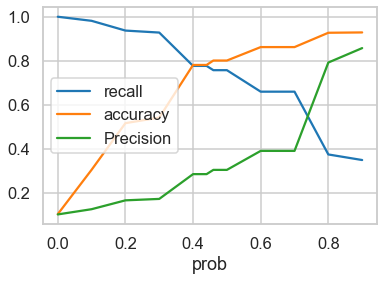

Classification Report test 
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      6614
           1       0.27      0.68      0.39       709

    accuracy                           0.79      7323
   macro avg       0.61      0.74      0.63      7323
weighted avg       0.89      0.79      0.83      7323



In [77]:
##hyper parameter values for Decision Tree
# Data is imbalanced to handle that we are instructing algorithm using the "class_weight:balanced"
param_dtc = {'min_samples_leaf':[1,2,3,4],
          'min_samples_split' : [2,5,10],
          'class_weight':['balanced'],
          'criterion' : ['gini'],
          'random_state':[random_state],
          'max_depth':[5]
         }

# Model initializing
dtc = DecisionTreeClassifier()
opt=tune_model(dtc,param_dtc,'recall',df_train,y_train,df_test,y_test,'Decision Tree')

#### Random Forest

Best Hyper Parameters for  Random Forest :
 {'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_leaf': 1000, 'min_samples_split': 10, 'n_estimators': 100}
Confusion Matrix:

True Positives: 1617
True Negatives: 15511
False Positives: 592
False Negatives: 4249
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.78      0.87     19760
           1       0.28      0.73      0.40      2209

    accuracy                           0.78     21969
   macro avg       0.62      0.76      0.63     21969
weighted avg       0.89      0.78      0.82     21969

Area under the ROC curve :  84.8 %


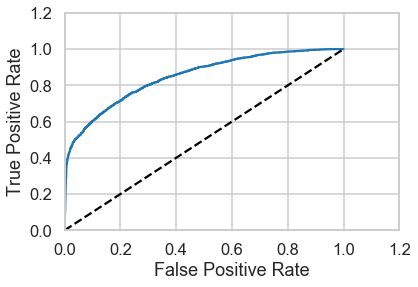

      prob  sensitivity  specificity  accuracy  Precision       FPR       NPV  \
0.00  0.00     1.000000     0.000000  0.100551   0.100551  1.000000       NaN   
0.10  0.10     1.000000     0.000000  0.100551   0.100551  1.000000       NaN   
0.20  0.20     0.992304     0.136032  0.222131   0.113787  0.863968  0.993715   
0.30  0.30     0.947488     0.379302  0.436433   0.145772  0.620698  0.984759   
0.40  0.40     0.864645     0.586184  0.614184   0.189353  0.413816  0.974836   
0.42  0.42     0.842463     0.634362  0.655287   0.204821  0.365638  0.972988   
0.44  0.44     0.815301     0.677075  0.690974   0.220117  0.322925  0.970407   
0.46  0.46     0.791308     0.715486  0.723110   0.237178  0.284514  0.968422   
0.48  0.48     0.761883     0.752024  0.753016   0.255659  0.247976  0.965813   
0.50  0.50     0.732005     0.784970  0.779644   0.275656  0.215030  0.963237   
0.60  0.60     0.559529     0.928694  0.891574   0.467297  0.071306  0.949648   
0.70  0.70     0.366229     

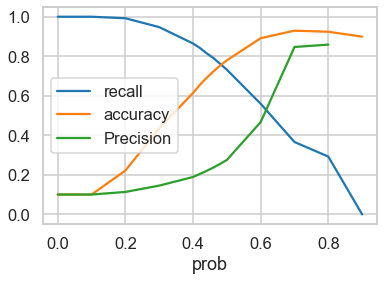

Classification Report test 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      6614
           1       0.25      0.68      0.37       709

    accuracy                           0.77      7323
   macro avg       0.61      0.73      0.61      7323
weighted avg       0.89      0.77      0.81      7323



In [78]:
##hyper parameter values for Randomforest
# Data is imbalanced to handle that we are instructing algorithm using the "class_weight:balanced"
param_rf = {'min_samples_leaf':[10,100,500,1000],
          'min_samples_split' : [10,5,100,1000],
          'n_estimators': [100],
          'class_weight':['balanced'],
          'criterion' : ['gini']}

#random forest classifier
rfc   = RandomForestClassifier()
opt = tune_model(rfc,param_rf,'recall',df_train,y_train,df_test,y_test,'Random Forest')

### Determination of best features

In [79]:
# Recursive Feature Eliminaton (RFE) to reduce the features
logit_rfe = LogisticRegression(class_weight='balanced')
# starting with 13 features
rfe = RFE(logit_rfe, 13)             
rfe = rfe.fit(X_train, y_train)

print("The Features obtained from using the RFE are as follows:")
print("=="*50)
pd.DataFrame(list(zip(X_train.columns, rfe.support_,rfe.ranking_)),columns=['Feature','Seleted by RFE?','Rank'])

The Features obtained from using the RFE are as follows:


,Feature,Seleted by RFE?,Rank
0,arpu_6,False,65
1,arpu_7,False,54
2,arpu_8,False,30
3,onnet_mou_6,False,93
4,onnet_mou_7,False,63
...,...,...,...
178,isd_og_mou_diff,False,119
179,spl_og_mou_diff,False,147
180,total_og_mou_diff,True,1
181,roam_ic_mou_diff,False,75


In [80]:
# List of features for Model building
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'total_rech_num_diff',
       'total_ic_mou_diff', 'total_og_mou_diff'],
      dtype='object')

Best Hyper Parameters for  Logistic Regression :
 {'C': 0.001, 'class_weight': 'balanced', 'random_state': 42}
Confusion Matrix:

True Positives: 1963
True Negatives: 12862
False Positives: 246
False Negatives: 6898
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     19760
           1       0.22      0.89      0.35      2209

    accuracy                           0.67     21969
   macro avg       0.60      0.77      0.57     21969
weighted avg       0.90      0.67      0.74     21969

Area under the ROC curve :  88.06 %


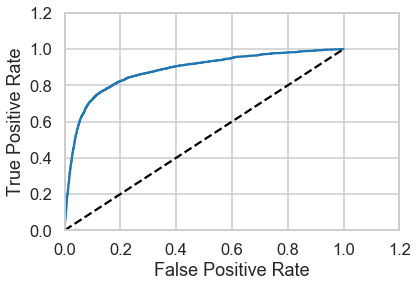

      prob  sensitivity  specificity  accuracy  Precision       FPR       NPV  \
0.00  0.00     1.000000     0.000000  0.100551   0.100551  1.000000       NaN   
0.10  0.10     1.000000     0.000000  0.100551   0.100551  1.000000       NaN   
0.20  0.20     1.000000     0.000000  0.100551   0.100551  1.000000       NaN   
0.30  0.30     1.000000     0.000000  0.100551   0.100551  1.000000       NaN   
0.40  0.40     1.000000     0.000354  0.100869   0.100583  0.999646  1.000000   
0.42  0.42     1.000000     0.000860  0.101325   0.100629  0.999140  1.000000   
0.44  0.44     0.999547     0.003441  0.103601   0.100822  0.996559  0.985507   
0.46  0.46     0.999095     0.013107  0.112249   0.101668  0.986893  0.992337   
0.48  0.48     0.995473     0.071913  0.164778   0.107070  0.928087  0.993012   
0.50  0.50     0.888637     0.650911  0.674815   0.221533  0.349089  0.981233   
0.60  0.60     0.000000     1.000000  0.899449        NaN  0.000000  0.899449   
0.70  0.70     0.000000     

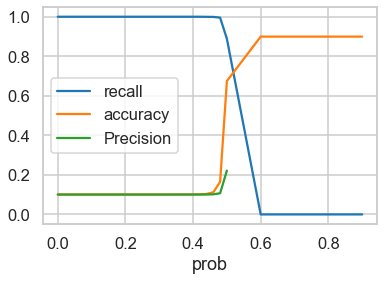

Classification Report test 
               precision    recall  f1-score   support

           0       0.98      0.66      0.79      6614
           1       0.22      0.90      0.36       709

    accuracy                           0.69      7323
   macro avg       0.60      0.78      0.57      7323
weighted avg       0.91      0.69      0.75      7323



In [81]:
param_lr = {'C': [ 0.001, 0.01,0.05,0.07, 0.1, 1],
           'class_weight':['balanced'],
           'random_state':[random_state]}

logit  = LogisticRegression(class_weight='balanced')
opt = tune_model(logit,param_lr,'recall',X_train[col_rfe],y_train,X_test[col_rfe],y_test,'Logistic Regression')

Text(0.5, 1.0, 'Feature Importance')

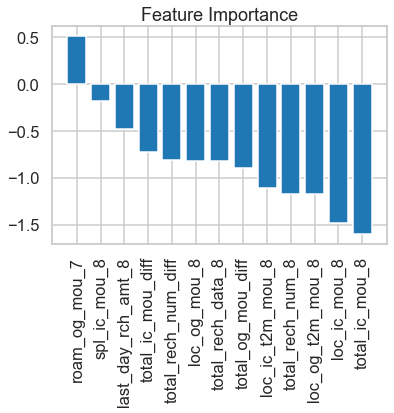

In [82]:
logit = LogisticRegression(C= 0.01, class_weight='balanced', random_state= 42)
logit.fit(X_train[col_rfe],y_train)
coefficients        = pd.DataFrame(logit.coef_.ravel())
feature_imp         = (pd.merge(coefficients,pd.DataFrame(col_rfe),left_index= True,right_index= True, how = "left"))
feature_imp.columns = ["coefficients","features"]
feature_imp         = feature_imp.sort_values(by = "coefficients",ascending = False)
  
plt.bar(feature_imp['features'],feature_imp['coefficients'])
plt.xticks(rotation='vertical')
plt.title('Feature Importance')

#### Inferences:

- It looks Logistic regression with RFE performs better than other models. The obtained score is also good.

#### Conclusion

- To handle the given business scenario the strategy is to decrease the false positives i.e improving the recall(sensitivity) because the main objective is to correctly predict the Actual churn users as 'churn' and not to miss any churn users as non-churn users(False Negative).

- Hence we have build models and focussed mainly on Sensitivity/Recall score.

- Model Selection : 
     - From the Different models that we have build, we can say that Logistic Regression with PCA (with PCA we cover 90% of variance from original data using 13 components) is good model as difference between the train and test Sensitivity/Recall scores does not deviate much and hence it is better model. However that is not the case with Models like Random forest classifier and decision tree classifier.
     - Logistic with PCA is good for Predictions however it is not interpretable. 
     - To have good interpretable model, Logistic Regression using RFE Model is chosen to determine the most important/best   features that are important for business.

#### Business Recommedations

- Top Features that indicate Churn : 
        1. roam_og_mou_7
        2. loc_og_t2m_mou_8
        3. loc_og_mou_8
        4. total_og_mou_8
        5. loc_ic_t2m_mou_8
        6. loc_ic_mou_8
        7. total_ic_mou_8
        8. spl_ic_mou_8
        9. total_rech_num_8
        10.last_day_rch_amt_8
        11.total_rech_data_8
        12.sep_vbc_3g
        13.total_ic_mou_diff
        
- Most of the important features that were important are coming from action phase(third month).
- Action phase month is most important for churn prediction.
